In [1]:
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from IPython.core.display import clear_output, display

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
module_path = os.path.abspath(os.path.join('../..'))

In [4]:
from ariadne.parsing import parse_df
import ariadne.transformations  as trn

In [5]:
from prepare import parse

In [6]:
!ls ../lightning_logs/TrackNETv2

last	    version_18	version_28  version_38	version_48  version_58
version_0   version_19	version_29  version_39	version_49  version_59
version_1   version_2	version_3   version_4	version_5   version_6
version_10  version_20	version_30  version_40	version_50  version_60
version_11  version_21	version_31  version_41	version_51  version_61
version_12  version_22	version_32  version_42	version_52  version_62
version_13  version_23	version_33  version_43	version_53  version_63
version_14  version_24	version_34  version_44	version_54  version_7
version_15  version_25	version_35  version_45	version_55  version_8
version_16  version_26	version_36  version_46	version_56  version_9
version_17  version_27	version_37  version_47	version_57


In [6]:
elem = '../ariadne/data/bmn_data/bmn_5.txt'
csv_params={
                    "sep": '\s+',
                    #"nrows": 500000,
                    "encoding": 'utf-8',
                    "names":  ['event',  'x', 'y', 'z', 'det','station', 'track', 'px', 'py', 'pz', 'vx', 'vy', 'vz']
                 }
df = parse_df(elem, **csv_params)
sns.set_style('darkgrid')
grouped_df = df.groupby('event')
num_hits = []
num_tracks = []
num_fakes = []
one_event = None
num = 163

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
df['station'].value_counts()

0    5075410
1    3921009
2    2547493
3    1348061
4    1108471
5    1042494
Name: station, dtype: int64

In [9]:
for i, ev_data in grouped_df:
    if i > 0:
        break
    stations = ev_data.groupby('station').size().max()
    #max_station = max(stations)
    num_hits.append(stations)
    num_fakes.append(len(ev_data[ev_data['track']==-1]))
    num_tracks.append(ev_data[ev_data['track']!=-1].groupby('track').ngroups)
max_num_hits = []
num_events = []
for i in range(1, len(num_hits)):
    max_num_hits.append(np.max(num_hits[:i]))
    num_events.append(i)

In [10]:
matplotlib.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
#plt.figure(figsize=(12,12))
print(one_event[one_event['track']!=-1].groupby('track').ngroups)
fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig) # Method 1

ax.scatter(one_event.x, one_event.z, one_event.y, c=one_event['track'])
for j, track in one_event[one_event['track']!=-1].groupby('track'):
    ax.plot(track.x, track.z, track.y)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
fig.suptitle(f'Event {num} hits', size=16)

before = [0.2734375, 0.20089285714285715,0.2609276729559748,  0.8058823529411764,  0.8563515949591899]
after = [0.42948717948717946, 0.5410628019323671, 0.715251572327044, 0.8372759856630825, 0.883185294165443]
#ticks = np.arange(5,10)
#plt.plot(ticks, before, label='Efficiency before rebalance')
#plt.plot(ticks, after, label='Efficiency after rebalance')
#plt.legend()
plt.show()
#sns.distplot(num_hits).set_title('Histogram of all hits in event')
plt.savefig('event_{num}_hits.png')


TypeError: 'NoneType' object is not subscriptable

In [9]:

z_values = {0:12.344, 1: 15.614, 2: 24.499, 3: 39.702, 4: 64.535, 5: 112.649, 6: 135.330,7: 160.6635, 8: 183.668}

In [10]:
one_event = df[df['event']==1]

In [ ]:
one_event

In [ ]:
one_event

In [17]:
one_event.loc[one_event.det == 1, 'station'] = one_event.loc[one_event.det == 1, 'station'].values + 3


NameError: name 'z_values' is not defined

In [ ]:
transformed = transformer(one_event)



In [ ]:
transformed[transformed['track']!=-1]

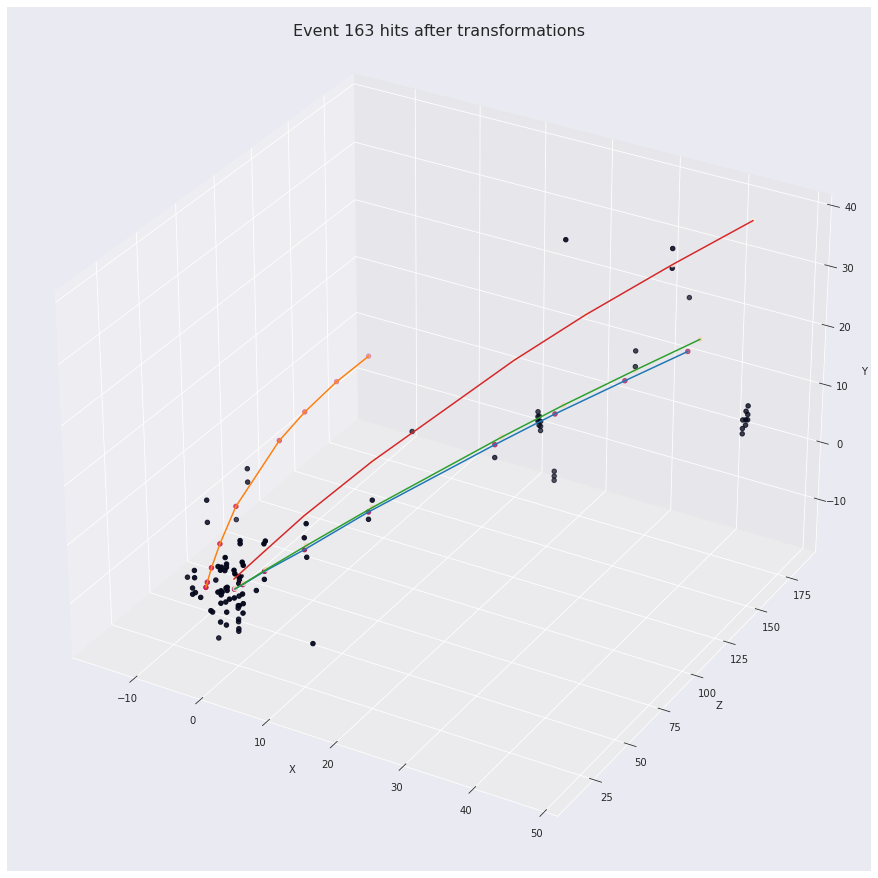

In [17]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig) # Method 1
ax.scatter(transformed.x, transformed.z, transformed.y, c=transformed['track'])
for j, track in transformed[transformed['track']!=-1].groupby('track'):
    ax.plot(track.x, track.z, track.y)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
fig.suptitle(f'Event {num} hits after transformations', size=16)
plt.show()

In [10]:
from ariadne.utils.model import get_checkpoint_path, weights_update
from ariadne.tracknet_v2.model import TrackNETv2
from ariadne.tracknet_v2_1.model import TrackNetClassifier

In [11]:
tracknet_input_features=3
tracknet_conv_features=32
DEVICE='cpu'

In [12]:
import torch

tracknet_ckpt_path_dict = {'model_dir': '/zfs/hybrilit.jinr.ru/user/n/nuvard/ariadne/lightning_logs/TrackNETv2', 
                           'version': 'version_71', 'checkpoint': 'latest'}
classifier_ckpt_path_dict = {'model_dir': '/zfs/hybrilit.jinr.ru/user/n/nuvard/ariadne/lightning_logs/TrackNetClassifier', 
                             'version': 'version_108', 'checkpoint': 'latest'}

In [13]:
path_to_tracknet_ckpt = get_checkpoint_path(**tracknet_ckpt_path_dict)
path_to_classifier_ckpt = get_checkpoint_path(**classifier_ckpt_path_dict)

model = weights_update(model=TrackNETv2(input_features=tracknet_input_features,
                                        conv_features=tracknet_conv_features,
                                        rnn_type='gru',
                                        batch_first=True),
                       checkpoint=torch.load(path_to_tracknet_ckpt, map_location=torch.device(DEVICE)))
model.eval()

TrackNETv2(
  (conv): Sequential(
    (0): Conv1d(3, 32, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): ReLU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (rnn): GRU(3, 32, num_layers=2, batch_first=True)
  (xy_coords): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
  )
  (r1_r2): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
    (1): Softplus(beta=1, threshold=20)
  )
)

In [14]:
model.to(DEVICE)

TrackNETv2(
  (conv): Sequential(
    (0): Conv1d(3, 32, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): ReLU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (rnn): GRU(3, 32, num_layers=2, batch_first=True)
  (xy_coords): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
  )
  (r1_r2): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
    (1): Softplus(beta=1, threshold=20)
  )
)

In [15]:
from ariadne.utils.data import load_data
from ariadne.utils.base import store_in_index,search_in_index
from ariadne.graph_net.graph_utils.graph_prepare_utils import to_pandas_graph_from_df


from ariadne.transformations import Compose, ConstraintsNormalize, ToCylindrical, DropSpinningTracks, DropShort

In [16]:
from ariadne.utils.base import *
from ariadne.utils.inference import *

In [17]:
import itertools

def get_seeds(hits, columns=['x','y','z']):
    temp1 = hits[hits.station == 0]
    st0_hits = hits[hits.station == 0][columns].values
    temp2 = hits[hits.station == 1]
    st1_hits = hits[hits.station == 1][columns].values
    # all possible combinations
    idx0 = range(len(st0_hits))
    idx1 = range(len(st1_hits))
    idx_comb = itertools.product(idx0, idx1)
    # unpack indices
    idx0, idx1 = zip(*idx_comb)
    idx0 = list(idx0)
    idx1 = list(idx1)
    # create seeds array
    seeds = np.zeros((len(idx0), 2, 3))
    seeds[:, 0, ] = st0_hits[idx0]
    seeds[:, 1, ] = st1_hits[idx1]
    return seeds

In [18]:
_columns=('x', 'y', 'z')   

In [19]:
def filter_hits_in_ellipses(ellipses, nearest_hits, hits_index, z_last=True, filter_station=True, find_n=10):
    """Function to get hits, which are in given ellipse.
    Space is 3-dimentional, so either first component of ellipce must be z-coordinate or third.
    Ellipse semiaxises must include x- and y-axis.
    Arguments:
        ellipse (np.array of size 5): predicted index with z-component like
                                      (x,y,z, x-semiaxis, y_semiaxis) or (z, x,y, x-semiaxis, y_semiaxis)
        nearest_hits (np.array of shape (n_hits, 3) or only 3): some hits in 3-dim space
        z_last (bool): If True, first component of vector is interpreted as z, if other, third.
        filter_station (bool): if True, only hits with same z-coordinate are considered, else all hits
    Returns:
        numpy.ndarry with filtered hits, all of them in given ellipse, sorted by increasing of distance
    """
    assert nearest_hits.shape[-1] == 3, "index is 3-dimentional, please add z-coordinate to centers"
    if nearest_hits.ndim < 2:
        nearest_hits = np.expand_dims(nearest_hits, 0)
    if nearest_hits.ndim < 3:
        nearest_hits = np.expand_dims(nearest_hits, 0)
    assert ellipses.shape[-1] == 5, "index is 3-dimentional, you need to provide z-coordinate (z_c, x_c, y_c, x_r, y_r) or (x_c, y_c, z_c, x_r, y_r)"
    #ellipses = np.expand_dims(ellipses, -1)
    #find_n = len(nearest_hits)
    ellipses = np.expand_dims(ellipses, 2)
    #found_hits = nearest_hits.reshape(-1, find_n, nearest_hits.shape[-1])
    if z_last:
        x_part = (ellipses[:,0].repeat(find_n,1) - nearest_hits[:, :, 0]) / ellipses[:, 3].repeat(find_n,1)
        #print(x_part**2)
        y_part = (ellipses[:,1].repeat(find_n,1) - nearest_hits[:, :, 1]) / ellipses[:, 4].repeat(find_n,1)
        #print(y_part**2)
    else:
        x_part = (nearest_hits[:, :, 1] - ellipses[:, 1].repeat(find_n, 1)) / ellipses[:, -2].repeat(find_n, 1)
        y_part = (nearest_hits[:, :, 2] - ellipses[:, 2].repeat(find_n, 1)) / ellipses[:, -1].repeat(find_n, 1)
    left_side = x_part**2 + y_part**2
    is_in_ellipse = left_side <= 1
    is_in_ellipse *= hits_index != -1
    return nearest_hits, is_in_ellipse

In [37]:
NUM_COMPONENTS = 2
SUFX = ['_p', '_c']
COLS = ['x', 'y', 'z']

def build_index(target_df):
    cont = np.ascontiguousarray(target_df[COLS].values)
    return store_in_index(cont, n_dim = 3)

def build_hits(target_df):
    cont = np.ascontiguousarray(target_df[COLS].values)
    return cont

def search(points, index):
    cont = np.ascontiguousarray(points[COLS].values)
    return search_in_index(cont, index, 10, n_dim=3)

def to_cart(df):
    graph=to_pandas_graph_from_df(df,SUFX, save_index=False)
    seeds = graph[(graph.station_p == 0) & (graph.station_c == 1)]
    target = df[df.station == 2]
    return seeds, target

def seeds_to_input(seeds_df):
    return seeds_df[['x_p', 'y_p', 'z_p', 'x_c', 'y_c', 'z_c']].values.reshape((-1, 2, 3))

def process_one_event(event_df):
    event_df.loc[event_df["det"] == 1, 'station'] = event_df.loc[event_df["det"] == 1, 'station'].values + 3
    event_df = event_df[['event','x','y','z','station','track']]
    try:
        event_df = transformer(event_df)
    except AssertionError as err:
        print("ASS error %r" % err)
        return None
    event_df.rename(columns={'index': 'index_old'}, inplace=True)
    preds, labels, ellipses = go_over_stations(event_df, max_n_stations=9)
    return preds, ellipses, labels, event_df
    #return seeds, target

In [ ]:
temp  = one_event[['x','y','z']][:10]

In [19]:
index = build_index(temp)

NameError: name 'temp' is not defined

In [20]:
search

<function __main__.search(points, index)>

In [39]:
def get_data_for_ellipses(x, preds, grus, mask):
    empty_ellipses_mask = (mask.sum(axis=-1) == 0) # if nothing is found in ellipse
    empty_ellipses = preds[empty_ellipses_mask]#.detach().cpu().numpy()
    full_ellipses = preds[~empty_ellipses_mask]
    empty_xs = x[empty_ellipses_mask]
    empty_grus = grus[empty_ellipses_mask]#.detach().cpu().numpy()
    return empty_xs, empty_ellipses, empty_grus, full_ellipses

In [22]:
import gin

In [23]:
gin.enter_interactive_mode()

In [24]:
def get_tracks(df, min_len=4):
    tracks = df[df['track'] != -1].groupby('track')
    multiplicity = tracks.ngroups
    tracks_vs_len = {3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
    all_tracks = []
    for i, track in tracks:
        temp_track = track[['x', 'y', 'z']].values
        if len(temp_track) >= min_len:
            tracks_vs_len[len(temp_track)].append(temp_track)
            all_tracks.append(temp_track)
    for stations_in_track, this_track_list in tracks_vs_len.items():
        if len(this_track_list) > 0:
            tracks_vs_len[stations_in_track] = np.stack(this_track_list, 0)
    return tracks_vs_len, all_tracks, multiplicity

In [25]:
def get_labels(gt_tracks, predicted_tracks, use_torch=False, device='cuda'):
    if use_torch:
        labels_for_ellipses = torch.zeros(len(predicted_tracks), dtype=torch.bool, device=device)
        assert len(predicted_tracks) > 0, 'Can not compute labels for empty set of tracks!'
        if len(gt_tracks) > 0:
            expanded_tracks = gt_tracks.unsqueeze(0).repeat((len(predicted_tracks), 1, 1, 1))
            expanded_xs = predicted_tracks.unsqueeze(1).repeat((1, expanded_tracks.shape[1], 1,1))
            labels_for_ellipses += torch.any(torch.all(torch.all(torch.isclose(expanded_tracks.float(), expanded_xs.float().to(device), rtol=1e-04 ), dim=-1), dim=-1),
                                             dim=-1)
            assert len(labels_for_ellipses) == len(expanded_xs), 'length of labels and xs is different!'
        labels_for_ellipses_numpy = labels_for_ellipses.detach().cpu().numpy()
        del labels_for_ellipses
        return labels_for_ellipses_numpy
    else:
        labels_for_ellipses = np.zeros(len(predicted_tracks), dtype=bool)
        assert len(predicted_tracks) > 0, 'Can not compute labels for empty set of tracks!'
        if len(gt_tracks) > 0:
            expanded_tracks = np.expand_dims(gt_tracks, 0).repeat(len(predicted_tracks), 0)
            expanded_xs = np.expand_dims(predicted_tracks, 1).repeat(expanded_tracks.shape[1], 1)
            labels_for_ellipses += np.any(
                np.all(np.all(np.equal(expanded_tracks, expanded_xs), axis=-1),
                       axis=-1), axis=-1)
            assert len(labels_for_ellipses) == len(expanded_xs), 'length of labels and xs is different!'
    return labels_for_ellipses


In [26]:
def prolong(x, gru, nearest_hits_mask, nearest_hits, stations_gone, use_torch=False):
    if use_torch:
        xs_for_prolong = x.unsqueeze(1).repeat((1, nearest_hits_mask.shape[-1], 1,1))
        grus_for_prolong = gru.unsqueeze(1)
        grus_for_prolong = grus_for_prolong.repeat((1, nearest_hits_mask.shape[-1], 1))
        prolonged_xs = torch.zeros((len(xs_for_prolong),
                                    nearest_hits_mask.shape[-1],
                                    xs_for_prolong.shape[-2] + 1,
                                    xs_for_prolong.shape[-1]))
        prolonged_xs[:, :, :xs_for_prolong.shape[-2], :] = xs_for_prolong
        prolonged_xs[:, :, xs_for_prolong.shape[-2], :] = nearest_hits
        print(prolonged_xs.shape)
        prolonged_xs = prolonged_xs.reshape(-1, stations_gone + 1, 3)
        nearest_hits_mask = nearest_hits_mask.reshape(-1)
        print(nearest_hits_mask)
        print(prolonged_xs)
        prolonged_xs = prolonged_xs[nearest_hits_mask]
        prolonged_grus = grus_for_prolong.reshape(-1, grus_for_prolong.shape[-1])
        prolonged_grus = prolonged_grus[nearest_hits_mask]
    else:
        xs_for_prolong = np.expand_dims(x, 1).repeat(nearest_hits_mask.shape[-1], 1)
        grus_for_prolong = np.expand_dims(gru.detach().cpu().numpy(), 1).repeat(nearest_hits_mask.shape[-1], 1)
        prolonged_xs = np.zeros(
            (len(xs_for_prolong), nearest_hits_mask.shape[-1], xs_for_prolong.shape[2] + 1, 3))

        prolonged_xs[:, :, :xs_for_prolong.shape[2], :] = xs_for_prolong
        prolonged_xs[:, :, xs_for_prolong.shape[2], :] = nearest_hits
        prolonged_xs = prolonged_xs[nearest_hits_mask].reshape(-1, stations_gone + 1, 3)
        prolonged_grus = grus_for_prolong[nearest_hits_mask].reshape(-1,
                                                                     grus_for_prolong.shape[-2],
                                                                     grus_for_prolong.shape[-1])
    return prolonged_xs, prolonged_grus

In [27]:
def get_labels_faiss(gt_tracks, predicted_tracks, index):
    labels_for_ellipses = np.zeros(len(predicted_tracks))
    assert len(predicted_tracks) > 0, 'Can not compute labels for empty set of tracks!'
    if len(gt_tracks) > 0:
        tracks_len = gt_tracks.shape[-2]
        gt_tracks = gt_tracks.reshape(-1, gt_tracks.shape[-1])
        predicted_tracks = predicted_tracks.reshape(-1, gt_tracks.shape[-1])
        gt_index = search_in_index(gt_tracks, index, 1, n_dim=3).flatten().reshape(-1, tracks_len)
        predicted_index = search_in_index(predicted_tracks, index, 1, n_dim=3).flatten().reshape(-1, tracks_len)
        expanded_gt = np.expand_dims(gt_index, 0).repeat(len(predicted_index), 0)
        expanded_preds = np.expand_dims(predicted_index, 1).repeat(expanded_gt.shape[1], 1)
        labels_for_ellipses += np.any(np.all(np.equal(expanded_gt, expanded_preds), axis=-1),axis=-1)
        assert len(labels_for_ellipses) == len(expanded_preds), 'length of labels and xs is different!'
    return labels_for_ellipses

In [28]:
temp_x = torch.ones((2, 5, 3))
temp_x[1]*=2
temp_x[:,1:]*=2
temp_x[:,2:]*=3
temp_x[:,3:]*=3
temp_x[:,4:]*=3
temp_x[:,:, 2:]*=2
temp_x[:,:, 1:]*=2
temp_preds = torch.ones((5, 5, 3))
temp_preds[1:]*=2
temp_preds[2:]*=3
temp_preds[:,1:]*=2
temp_preds[:,2:]*=3
temp_preds[:,3:]*=3
temp_preds[:,4:]*=3
temp_preds[:,:, 2:]*=2
temp_preds[:,:, 1:]*=2

In [ ]:
temp_preds[0] - temp_x[0]

In [39]:
temp_index = store_in_index(temp_preds.unique(dim=-1).detach().cpu().numpy().reshape(-1,3), num_components = 3)

NameError: name 'temp_preds' is not defined

In [ ]:
get_labels_faiss(temp_x.detach().cpu().numpy(), temp_preds.detach().cpu().numpy(), index=temp_index)

In [29]:
def get_candidates(preds, targets, grus, ellipses, index, labels,  labels_for_batch, gru_candidates, track_candidates, candidate_ellipses):
    orig_ellipses = torch.zeros((len(ellipses), 4))
    orig_ellipses[:, :2] = ellipses[:, :2]
    orig_ellipses[:, 2:] = ellipses[:, 3:]
    labels_for_ellipses = get_labels_faiss(targets,
                                     preds.detach().cpu().numpy(), index=index)
    labels_for_batch.append(labels_for_ellipses)
    gru_candidates.extend(grus)  # because we need gru for predicted ellipse
    labels.extend(labels_for_ellipses)
    track_candidates.extend(preds)
    candidate_ellipses.extend(orig_ellipses)
    return labels, labels_for_batch, gru_candidates, track_candidates, candidate_ellipses

In [30]:
def get_seeds_only_real(df, columns=['x','y','z']):
    real = df[df['track']!=-1]
    temp1 = real[real.station == 0]
    st0_hits = temp1[columns].values
    temp2 = real[real.station == 1]
    st1_hits = temp2[columns].values
    # all possible combinations
    seeds = np.zeros((len(temp1), 2, 3))
    seeds[:, 0, ] = st0_hits
    seeds[:, 1, ] = st1_hits
    return seeds

In [31]:
def get_seeds_only_real_one_hit(df, columns=['x','y','z']):
    real = df[df['track']!=-1]
    temp1 = real[real.station == 0]
    st0_hits = temp1[columns].values
    #temp2 = real[real.station == 1]
    #st1_hits = temp2[columns].values
    # all possible combinations
    seeds = np.zeros((len(temp1), 1, 3))
    seeds[:, 0, ] = st0_hits
    #seeds[:, 1, ] = st1_hits
    print('seeds:', seeds)
    return seeds

In [35]:
def go_over_stations(df, max_n_stations=9):
    max_batch_size = 256
    all_hits_index = build_index(df)
    tracks_vs_len, all_tracks, multiplicity = get_tracks(df)
    print(tracks_vs_len)
    # seeds, target = to_cart(df)
    chunk_data_x = get_seeds_only_real(df)
    # print(chunk_data_x)
    # chunk_data_x = np.expand_dims(chunk_data_x, 1)
    # index = build_index(target)
    # search(target[:2], index)
    # chunk_data_x = seeds_to_input(seeds)
    chunk_data_len = torch.tensor(np.full(len(chunk_data_x), 2), dtype=torch.int64).to(DEVICE)
    gru_candidates = []
    x_candidates = []
    candidate_labels = []
    candidate_ellipses = []
    for stations_gone in range(2, max_n_stations):
        print(f'===> {stations_gone}')
        num_batches = int(len(chunk_data_x) / max_batch_size) + 1
        num_right_batches = 0
        num_all_batches = 0
        next_stage_xs = []
        next_stage_lens = []
        if len(chunk_data_x) == 0:
            print('Have zero ellipces on this station! Skipping other stations')
            return x_candidates, candidate_labels, candidate_ellipses
        labels_for_empty_el_batch = []
        labels_for_full_el_batch = []
        station_df = df[df['station'] == stations_gone]
        current_index = build_index(station_df)
        this_station_hits = build_hits(station_df)
        for batch_num in range(num_batches):
            min_i = max_batch_size * batch_num
            max_i = min(max_batch_size + min_i, len(chunk_data_x))
            if min_i == max_i:
                print('Have zero ellipces on this station! Skipping other stations')
                return x_candidates, candidate_labels, candidate_ellipses

            this_batch_x = torch.tensor(chunk_data_x[min_i: max_i]).to(DEVICE)
            this_batch_len = chunk_data_len[min_i: max_i]
            batch_prediction, batch_gru = model(this_batch_x.float(),
                                                torch.tensor(this_batch_len, dtype=torch.int64).to(DEVICE),
                                                return_gru_states=True)
            new_pred = torch.full((len(batch_prediction), 5), z_values[stations_gone], device=DEVICE)
            new_pred[:, :2] = batch_prediction[:, -1, :2]
            new_pred[:, 3:] = batch_prediction[:, -1, 2:]
            batch_prediction = new_pred
            batch_gru = batch_gru[:, -1]
            if batch_num == 0:
                print(f'station {stations_gone + 1}, on this station: {len(this_station_hits)} hits')
            if len(this_station_hits) == 0:
                LOGGER.info('Have zero hits on this station! Skipping other stations')
                return x_candidates, candidate_labels, candidate_ellipses
            prediction_numpy = batch_prediction.detach().cpu().numpy()
            nearest_hits_index = search_in_index(prediction_numpy[:, :3],
                                                 current_index,
                                                 10,
                                                 n_dim=3)
            nearest_hits = this_station_hits[nearest_hits_index]
            nearest_hits, in_ellipse_mask = filter_hits_in_ellipses(prediction_numpy,
                                                                    nearest_hits,
                                                                    nearest_hits_index,
                                                                    filter_station=False,
                                                                    z_last=True,
                                                                    find_n=nearest_hits_index.shape[1])
            nearest_hits = torch.from_numpy(nearest_hits)
            nearest_hits_mask = in_ellipse_mask
            # here empty ellipses and all inputs for them are saved
            print(nearest_hits_mask[:2])
            empty_xs, empty_ellipses, empty_grus, predicted_ellipses = get_data_for_ellipses(this_batch_x,
                                                                                             batch_prediction,
                                                                                             batch_gru,
                                                                                             nearest_hits_mask)
            print(len(batch_prediction))
            print(len(empty_ellipses))
            print(len(predicted_ellipses))
            prolonged_batch_xs, prolonged_grus = prolong(this_batch_x,
                                                         batch_gru,
                                                         nearest_hits_mask,
                                                         nearest_hits,
                                                         stations_gone,
                                                         use_torch=True)
            next_stage_xs.append(prolonged_batch_xs)
            next_stage_lens.append(np.full(len(prolonged_batch_xs), stations_gone + 1))
            if stations_gone > 3:
                use_empty_ellipses = []
                empty_ellipses_station_intersections = []
                use_empty_ellipses = torch.ones(len(empty_ellipses), dtype=torch.bool)
                empty_xs = empty_xs[use_empty_ellipses]
                print(empty_xs)
                empty_grus = empty_grus[use_empty_ellipses]
                if len(empty_xs) > 0:
                    (candidate_labels,
                     labels_for_empty_el_batch,
                     gru_candidates,
                     x_candidates,
                     candidate_ellipses) = get_candidates(empty_xs,
                                                          tracks_vs_len[stations_gone],
                                                          prolonged_grus[:, -2],
                                                          empty_ellipses,
                                                          all_hits_index,
                                                          candidate_labels,
                                                          labels_for_empty_el_batch,
                                                          gru_candidates,
                                                          x_candidates,
                                                          candidate_ellipses)
            if (stations_gone == (max_n_stations - 1)):  # if we are predicting for last station
                if len(prolonged_batch_xs) > 0:  # now we prolong candidates with all hits *in* ellipses
                    (candidate_labels,
                     labels_for_full_el_batch,
                     gru_candidates,
                     x_candidates,
                     candidate_ellipses) = get_candidates(prolonged_batch_xs,
                                                          tracks_vs_len[stations_gone + 1],
                                                          prolonged_grus[:, -1],
                                                          predicted_ellipses,
                                                          all_hits_index,
                                                          candidate_labels,
                                                          labels_for_full_el_batch,
                                                          gru_candidates,
                                                          x_candidates,
                                                          candidate_ellipses)

        if len(next_stage_xs) > 1:
            chunk_data_x = np.concatenate(next_stage_xs, 0)
            chunk_data_len = np.concatenate(next_stage_lens, 0)
        else:
            try:
                chunk_data_x = next_stage_xs[0]
                chunk_data_len = next_stage_lens[0]
            except:
                continue
    return x_candidates, candidate_labels, candidate_ellipses

In [33]:
one_event

event          x          y        z  det  station  track        px  \
1002      1   2.771679   0.281289   11.979    0        0     -1  0.000000   
1003      1   2.771679  -2.228503   11.979    0        0     31  0.601710   
1004      1   2.656870   0.836981   11.979    0        0     -1  0.000000   
1005      1   2.656870  -2.348267   11.979    0        0     13  0.569849   
1006      1   2.590705  -0.678447   11.979    0        0     33  0.238252   
...     ...        ...        ...      ...  ...      ...    ...       ...   
1131      1  43.032370  37.206800  183.818    1        5     33  0.531020   
1132      1  35.942770  15.108370  183.818    1        5     31  0.892348   
1133      1  34.186610  21.662460  183.818    1        5     -1  0.000000   
1134      1  34.186610  12.473200  183.818    1        5     13  0.860409   
1135      1 -14.963280  -3.926660  183.818    1        5     16  0.026112   

            py        pz        vx        vy        vz  
1002  0.000000  0.000000  0.000000  0.000000  0.000000  
1003  0.387549  3.884144  0.770924 -3.540086 -1.151055  
1004  0.000000  0.000000  0.000000  0.000000  0.000000  
1005  0.333992  3.905233  0.770924 -3.540086 -1.151055  
1006  0.358872  1.656099  0.770924 -3.540086 -1.151055  
...        ...       ...       ...       ...       ...  
1131  0.360114  1.585667  0.770924 -3.540086 -1.151055  
1132  0.389288  3.827012  0.770924 -3.540086 -1.151055  
1133  0.000000  0.000000  0.000000  0.000000  0.000000  
1134  0.336489  3.850817  0.770924 -3.540086 -1.151055  
1135 -0.001372  1.592775  0.770924 -3.540086 -1.151055  

[134 rows x 13 columns]

In [33]:
transformer = trn.Compose([
    trn.DropShort(num_stations=4),
    trn.DropTracksWithHoles(),
    trn.DropSpinningTracks(),
    #@DropFakes(),
    trn.BakeStationValues(values=z_values),]
    #@ToCylindrical(),
    #@ConstraintsNormalize(),
   # @ToBuckets(),
)


In [40]:
one_event = df[df.event == 0]
preds, ellipses, labels, event_df = process_one_event(one_event)

{3: [], 4: array([[[ 2.206831, -4.148226, 12.344   ],
        [ 2.680053, -4.301381, 15.614   ],
        [ 4.370823, -4.813928, 24.499   ],
        [ 7.519342, -5.553101, 39.702   ]],

       [[-3.494453, -4.224186, 12.344   ],
        [-4.188253, -4.386579, 15.614   ],
        [-5.446515, -4.759852, 24.499   ],
        [-6.373987, -5.417351, 39.702   ]]]), 5: array([[[ 0.1562779, -1.538111 , 12.344    ],
        [ 0.2796341, -1.097775 , 15.614    ],
        [ 0.946032 , -0.172354 , 24.499    ],
        [ 4.301402 ,  6.456415 , 39.702    ],
        [16.00282  ,  0.2570905, 64.535    ]]]), 6: array([[[  2.658756 ,   0.6553643,  12.344    ],
        [  3.343926 ,   1.700543 ,  15.614    ],
        [  5.303983 ,   4.357539 ,  24.499    ],
        [ 10.3557   ,   9.522198 ,  39.702    ],
        [ 21.53152  ,  18.76442  ,  64.535    ],
        [ 58.00927  ,  38.52792  , 112.649    ]]]), 7: array([[[  4.128531 ,  -1.885697 ,  12.344    ],
        [  5.05668  ,  -1.466706 ,  15.614    ],
   

In [41]:
preds

[tensor([[ 2.6141, -1.2950, 12.3440],
         [ 3.1451, -0.7263, 15.6140],
         [ 4.5151,  0.6832, 24.4990],
         [ 7.5193,  2.3896, 39.7020]]),
 tensor([[ 2.2068, -4.1482, 12.3440],
         [ 2.6801, -4.3014, 15.6140],
         [ 4.3708, -4.8139, 24.4990],
         [ 7.5193, -5.5531, 39.7020]]),
 tensor([[-3.4945, -4.2242, 12.3440],
         [-4.1883, -4.3866, 15.6140],
         [-5.4465, -4.7599, 24.4990],
         [-6.3740, -5.4174, 39.7020]]),
 tensor([[-3.4945, -4.2242, 12.3440],
         [-4.1883, -4.3866, 15.6140],
         [-5.4465, -4.7599, 24.4990],
         [-6.3740, -6.1571, 39.7020]]),
 tensor([[-3.4945, -4.2242, 12.3440],
         [-4.1883, -4.3866, 15.6140],
         [-5.4465, -4.7599, 24.4990],
         [-7.1791, -4.0796, 39.7020]]),
 tensor([[-3.4945, -4.2242, 12.3440],
         [-4.1883, -4.3866, 15.6140],
         [-5.4465, -4.7599, 24.4990],
         [-6.1274, -6.3376, 39.7020]]),
 tensor([[-2.3326, -2.9516, 12.3440],
         [-3.0068, -2.8501, 15.6140],


In [67]:
from tqdm import tqdm_notebook

In [ ]:
eff_list = []
num_events = 300
for i in tqdm_notebook(range(num_events)):
    one_event = df[df.event == i]
    preds, ellipses, labels, event_df = process_one_event(one_event)
    print(preds)
    print(sum(labels))
    mult = event_df[event_df.track!=-1].groupby('track').ngroups
    print(mult)
    if mult > 0:
         eff_list.append(sum(labels) / mult)
print(eff_list)
print(np.mean(eff_list))


  0%|          | 0/300 [00:00<?, ?it/s]

{3: [], 4: array([[[ 2.206831, -4.148226, 12.344   ],
        [ 2.680053, -4.301381, 15.614   ],
        [ 4.370823, -4.813928, 24.499   ],
        [ 7.519342, -5.553101, 39.702   ]],

       [[-3.494453, -4.224186, 12.344   ],
        [-4.188253, -4.386579, 15.614   ],
        [-5.446515, -4.759852, 24.499   ],
        [-6.373987, -5.417351, 39.702   ]]]), 5: array([[[ 0.1562779, -1.538111 , 12.344    ],
        [ 0.2796341, -1.097775 , 15.614    ],
        [ 0.946032 , -0.172354 , 24.499    ],
        [ 4.301402 ,  6.456415 , 39.702    ],
        [16.00282  ,  0.2570905, 64.535    ]]]), 6: array([[[  2.658756 ,   0.6553643,  12.344    ],
        [  3.343926 ,   1.700543 ,  15.614    ],
        [  5.303983 ,   4.357539 ,  24.499    ],
        [ 10.3557   ,   9.522198 ,  39.702    ],
        [ 21.53152  ,  18.76442  ,  64.535    ],
        [ 58.00927  ,  38.52792  , 112.649    ]]]), 7: array([[[  4.128531 ,  -1.885697 ,  12.344    ],
        [  5.05668  ,  -1.466706 ,  15.614    ],
   

[tensor([[ 2.6141, -1.2950, 12.3440],
        [ 3.1451, -0.7263, 15.6140],
        [ 4.5151,  0.6832, 24.4990],
        [ 7.5193,  2.3896, 39.7020]]), tensor([[ 2.2068, -4.1482, 12.3440],
        [ 2.6801, -4.3014, 15.6140],
        [ 4.3708, -4.8139, 24.4990],
        [ 7.5193, -5.5531, 39.7020]]), tensor([[-3.4945, -4.2242, 12.3440],
        [-4.1883, -4.3866, 15.6140],
        [-5.4465, -4.7599, 24.4990],
        [-6.3740, -5.4174, 39.7020]]), tensor([[-3.4945, -4.2242, 12.3440],
        [-4.1883, -4.3866, 15.6140],
        [-5.4465, -4.7599, 24.4990],
        [-6.3740, -6.1571, 39.7020]]), tensor([[-3.4945, -4.2242, 12.3440],
        [-4.1883, -4.3866, 15.6140],
        [-5.4465, -4.7599, 24.4990],
        [-7.1791, -4.0796, 39.7020]]), tensor([[-3.4945, -4.2242, 12.3440],
        [-4.1883, -4.3866, 15.6140],
        [-5.4465, -4.7599, 24.4990],
        [-6.1274, -6.3376, 39.7020]]), tensor([[-2.3326, -2.9516, 12.3440],
        [-3.0068, -2.8501, 15.6140],
        [-4.8163, -2.5355

[[ True  True False False False False False False False False]
 [ True False False False False False False False False False]]
7
0
7
torch.Size([7, 10, 8, 3])
[ True  True False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True  True False False False False
 False False False False  True  True False False False False False False
 False False  True  True False False False False False False False False
  True False False False False False False False False False]
tensor([[[  2.7717,  -2.2285,  12.3440],
         [  3.2792,  -1.8991,  15.6140],
         [  4.5949,  -1.0669,  24.4990],
         ...,
         [ 20.6691,   7.9572, 112.6490],
         [ 25.2029,  10.1903, 135.3300],
         [ 30.8019,  12.8205, 160.6635]],

        [[  2.7717,  -2.2285,  12.3440],
         [  3.2792,  -1.8991,  15.6140],
         [  4.5949,  -1.0669,  24.4990],
         ...,
         [ 20.6

tensor([[[ 2.1082e+00, -2.4052e+00,  1.2344e+01],
         [ 2.3704e+00, -1.9786e+00,  1.5614e+01],
         [ 3.0091e+00, -1.0531e+00,  2.4499e+01],
         [ 4.2380e+00,  3.6588e-01,  3.9702e+01],
         [ 5.5408e+00,  3.5517e+00,  6.4535e+01],
         [ 6.9917e+00,  8.8290e+00,  1.1265e+02],
         [ 7.1233e+00,  1.1285e+01,  1.3533e+02]],

        [[ 2.1082e+00, -2.4052e+00,  1.2344e+01],
         [ 2.3704e+00, -1.9786e+00,  1.5614e+01],
         [ 3.0091e+00, -1.0531e+00,  2.4499e+01],
         [ 4.2380e+00,  3.6588e-01,  3.9702e+01],
         [ 5.5408e+00,  3.5517e+00,  6.4535e+01],
         [ 6.9917e+00,  8.8290e+00,  1.1265e+02],
         [ 4.0220e+00,  1.6788e+01,  1.3533e+02]],

        [[ 2.1082e+00, -2.4052e+00,  1.2344e+01],
         [ 2.3704e+00, -1.9786e+00,  1.5614e+01],
         [ 3.0091e+00, -1.0531e+00,  2.4499e+01],
         [ 4.2380e+00,  3.6588e-01,  3.9702e+01],
         [ 5.5408e+00,  3.5517e+00,  6.4535e+01],
         [ 6.9917e+00,  8.8290e+00,  1.1265e+0

{3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
===> 2
Have zero ellipces on this station! Skipping other stations
[]
0
0
{3: [], 4: [], 5: [], 6: [], 7: [], 8: array([[[ -0.7184616,  -0.5561721,  12.344    ],
        [ -1.140245 ,   0.2411428,  15.614    ],
        [ -2.235955 ,   2.416854 ,  24.499    ],
        [ -3.892561 ,   6.054063 ,  39.702    ],
        [ -6.145796 ,  12.23311  ,  64.535    ],
        [ -8.480874 ,  23.88686  , 112.649    ],
        [ -8.697303 ,  29.28797  , 135.33     ],
        [ -8.236753 ,  35.56517  , 160.6635   ]],

       [[ -1.802217 ,  -0.40185  ,  12.344    ],
        [ -2.4469   ,   0.4315981,  15.614    ],
        [ -4.095308 ,   2.703733 ,  24.499    ],
        [ -6.530911 ,   6.497071 ,  39.702    ],
        [ -9.494087 ,  12.82823  ,  64.535    ],
        [-10.98873  ,  24.71189  , 112.649    ],
        [ -9.889756 ,  30.28516  , 135.33     ],
        [ -7.072373 ,  36.8528   , 160.6635   ]],

       [[  2.220462 ,  -0.9355042,  12.344    ],


[tensor([[ 3.4573, -1.3609, 12.3440],
        [ 4.0753, -0.6504, 15.6140],
        [ 5.7203,  0.9884, 24.4990],
        [ 8.6522,  3.5568, 39.7020]]), tensor([[ 3.2925, -1.5104, 12.3440],
        [ 3.8662, -0.9362, 15.6140],
        [ 5.3916,  0.5357, 24.4990],
        [ 9.2316,  4.2445, 39.7020]]), tensor([[ 2.4205, -2.9652, 12.3440],
        [ 2.7039, -2.7474, 15.6140],
        [ 3.3503, -2.1168, 24.4990],
        [ 3.8701, -1.3985, 39.7020]]), tensor([[ 2.4205, -2.9652, 12.3440],
        [ 2.7039, -2.7474, 15.6140],
        [ 2.7388, -2.4246, 24.4990],
        [-2.1018, -0.6292, 39.7020]]), tensor([[ 1.9679, -3.1349, 12.3440],
        [ 2.1825, -2.9271, 15.6140],
        [ 2.7388, -2.4246, 24.4990],
        [ 4.2747, -0.9664, 39.7020]]), tensor([[ 1.9679, -3.1349, 12.3440],
        [ 2.1825, -2.9271, 15.6140],
        [ 3.3503, -2.1168, 24.4990],
        [ 9.2316, -0.5958, 39.7020]]), tensor([[ 1.9679, -3.1349, 12.3440],
        [ 2.1825, -2.9271, 15.6140],
        [ 1.9868, -3.3325

{3: [], 4: [], 5: array([[[ 4.527718 , -0.4558447, 12.344    ],
        [ 5.614123 ,  0.4318838, 15.614    ],
        [ 9.311557 ,  3.167247 , 24.499    ],
        [16.31524  ,  7.496459 , 39.702    ],
        [33.07654  , 15.56004  , 64.535    ]],

       [[ 1.62447  , -1.75256  , 12.344    ],
        [ 1.811861 , -1.207277 , 15.614    ],
        [ 2.246496 ,  0.2046571, 24.499    ],
        [ 2.892475 ,  2.916812 , 39.702    ],
        [ 3.296726 ,  7.284359 , 64.535    ]]]), 6: [], 7: [], 8: array([[[ -0.8741603,  -0.4331789,  12.344    ],
        [ -1.228577 ,   0.3995397,  15.614    ],
        [ -2.10384  ,   2.651938 ,  24.499    ],
        [ -3.314079 ,   6.419522 ,  39.702    ],
        [ -4.467163 ,  12.82909  ,  64.535    ],
        [ -3.552259 ,  24.78664  , 112.649    ],
        [ -1.708092 ,  30.39671  , 135.33     ],
        [  1.514751 ,  36.9288   , 160.6635   ]]]), 9: array([[[-1.906606e+00, -2.808424e+00,  1.234400e+01],
        [-2.508980e+00, -2.594079e+00,  1.56140

[tensor([[ 4.5277, -0.4558, 12.3440],
        [ 5.6141,  0.4319, 15.6140],
        [ 9.3116,  3.1672, 24.4990],
        [16.3152,  6.9186, 39.7020]]), tensor([[ 4.0644, -1.9157, 12.3440],
        [ 4.8576, -1.3832, 15.6140],
        [ 6.4810,  0.3959, 24.4990],
        [ 8.3915,  3.5244, 39.7020]]), tensor([[ 1.4015, -1.4139, 12.3440],
        [ 1.5765, -0.7929, 15.6140],
        [ 2.0682,  0.8419, 24.4990],
        [ 2.8925,  4.6336, 39.7020]]), tensor([[ 1.4015, -1.4139, 12.3440],
        [ 1.5765, -0.7929, 15.6140],
        [ 2.0682,  0.8419, 24.4990],
        [ 2.8925,  5.2391, 39.7020]]), tensor([[-1.8500, -1.2650, 12.3440],
        [-2.4409, -0.6303, 15.6140],
        [-3.9553,  1.0887, 24.4990],
        [-6.4952,  4.0699, 39.7020]]), tensor([[-1.8500, -1.2650, 12.3440],
        [-2.4409, -0.6303, 15.6140],
        [-3.9553,  1.0887, 24.4990],
        [-6.1828,  2.9041, 39.7020]]), tensor([[-1.8500, -1.2650, 12.3440],
        [-2.4409, -0.6303, 15.6140],
        [-3.9553,  1.0887

station 9, on this station: 25 hits
[[False False False False False False False False False False]
 [False False False False False False False False False False]]
27
23
4
torch.Size([27, 10, 9, 3])
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False

station 8, on this station: 382 hits
[[ True  True  True  True  True  True False  True False False]
 [ True  True  True  True  True  True  True  True  True False]]
21
1
20
torch.Size([21, 10, 8, 3])
[ True  True  True  True  True  True False  True False False  True  True
  True  True  True  True  True  True  True False  True  True  True False
 False False False False False False  True  True False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False  True Fals

{3: [], 4: [], 5: array([[[  1.877996 ,   0.3337252,  12.344    ],
        [  2.403478 ,   1.405069 ,  15.614    ],
        [  4.189272 ,   4.055027 ,  24.499    ],
        [  9.536171 ,   9.245134 ,  39.702    ],
        [ 24.75716  ,  18.31315  ,  64.535    ]],

       [[ -1.503256 ,  -4.115221 ,  12.344    ],
        [ -2.04987  ,  -4.214768 ,  15.614    ],
        [ -3.651588 ,  -4.529304 ,  24.499    ],
        [ -6.676521 ,  -4.969572 ,  39.702    ],
        [-12.9742   ,  -5.833143 ,  64.535    ]]]), 6: array([[[ -0.2781157,  -4.086797 ,  12.344    ],
        [ -0.6093853,  -3.974552 ,  15.614    ],
        [ -1.790878 ,  -4.141215 ,  24.499    ],
        [ -4.899538 ,  -4.20512  ,  39.702    ],
        [-13.48904  ,  -4.738816 ,  64.535    ],
        [-46.34554  ,  -6.011584 , 112.649    ]],

       [[  4.630919 ,  -2.33839  ,  12.344    ],
        [  5.77218  ,  -2.0017   ,  15.614    ],
        [  9.556487 ,  -0.8696121,  24.499    ],
        [ 16.30647  ,   0.8480331,  39.70

{3: [], 4: array([[[ 2.109483, -4.610752, 12.344   ],
        [ 2.629562, -4.814046, 15.614   ],
        [ 4.466924, -5.469447, 24.499   ],
        [ 7.714169, -6.349821, 39.702   ]]]), 5: array([[[ -3.576746,  -3.25206 ,  12.344   ],
        [ -4.72614 ,  -3.194771,  15.614   ],
        [ -7.69515 ,  -3.132045,  24.499   ],
        [-16.54425 ,  -2.916798,  39.702   ],
        [-38.97528 ,  -2.970844,  64.535   ]]]), 6: [], 7: array([[[  2.667687 ,  -0.412232 ,  12.344    ],
        [  3.299548 ,   0.4145182,  15.614    ],
        [  5.007733 ,   2.52099  ,  24.499    ],
        [  8.812296 ,   6.604361 ,  39.702    ],
        [ 16.17351  ,  13.15212  ,  64.535    ],
        [ 35.09326  ,  25.82121  , 112.649    ],
        [ 46.35975  ,  32.07693  , 135.33     ]]]), 8: array([[[  2.582569 ,  -0.4233637,  12.344    ],
        [  3.16719  ,   0.2527885,  15.614    ],
        [  4.724429 ,   2.194074 ,  24.499    ],
        [  8.06986  ,   6.144984 ,  39.702    ],
        [ 14.05703  ,  

{3: [], 4: [], 5: array([[[ 4.956604, -3.958224, 12.344   ],
        [ 5.905197, -3.922072, 15.614   ],
        [ 8.821631, -4.457714, 24.499   ],
        [13.35976 , -5.016612, 39.702   ],
        [21.67299 , -5.899251, 64.535   ]],

       [[ 3.959848, -3.647869, 12.344   ],
        [ 4.674304, -3.751413, 15.614   ],
        [ 7.218672, -3.9083  , 24.499   ],
        [11.86699 , -4.208256, 39.702   ],
        [22.427   , -4.762271, 64.535   ]]]), 6: [], 7: array([[[  5.097208 ,   0.1907431,  12.344    ],
        [  6.119713 ,   0.9911717,  15.614    ],
        [  9.364994 ,   3.966012 ,  24.499    ],
        [ 14.66729  ,   8.361837 ,  39.702    ],
        [ 25.1582   ,  15.71696  ,  64.535    ],
        [ 50.52753  ,  30.82082  , 112.649    ],
        [ 65.09799  ,  38.01391  , 135.33     ]],

       [[ -3.77704  ,  -3.478852 ,  12.344    ],
        [ -5.019999 ,  -3.528086 ,  15.614    ],
        [ -7.89765  ,  -3.497619 ,  24.499    ],
        [-14.65057  ,  -3.550117 ,  39.702   

[tensor([[ 4.9566, -3.9582, 12.3440],
        [ 5.9052, -3.9221, 15.6140],
        [ 8.8216, -4.4577, 24.4990],
        [12.2917, -5.7932, 39.7020]]), tensor([[ 4.9566, -3.9582, 12.3440],
        [ 5.9052, -3.9221, 15.6140],
        [ 8.1805, -3.1816, 24.4990],
        [ 9.1945, -1.2476, 39.7020]]), tensor([[ 4.6377, -3.3305, 12.3440],
        [ 5.5078, -3.2760, 15.6140],
        [ 7.2493, -3.2076, 24.4990],
        [ 8.6727, -2.2357, 39.7020]]), tensor([[ 3.9598, -3.6479, 12.3440],
        [ 4.6743, -3.7514, 15.6140],
        [ 7.2493, -3.2076, 24.4990],
        [12.2917, -2.9437, 39.7020]]), tensor([[ 3.4901, -3.0239, 12.3440],
        [ 4.0589, -2.7533, 15.6140],
        [ 5.5365, -2.3301, 24.4990],
        [ 9.1945, -1.2476, 39.7020]]), tensor([[ 3.4901, -3.0239, 12.3440],
        [ 4.0589, -2.7533, 15.6140],
        [ 5.5365, -3.0010, 24.4990],
        [ 8.6727, -2.2357, 39.7020]]), tensor([[ 3.4901, -3.0239, 12.3440],
        [ 4.0589, -2.7533, 15.6140],
        [ 5.6260, -0.9509

{3: [], 4: [], 5: [], 6: [], 7: [], 8: array([[[  3.886856 ,  -2.70569  ,  12.344    ],
        [  4.697183 ,  -2.342967 ,  15.614    ],
        [  7.271389 ,  -1.32128  ,  24.499    ],
        [ 11.60469  ,   0.6622971,  39.702    ],
        [ 20.531    ,   2.866892 ,  64.535    ],
        [ 43.34647  ,   8.12395  , 112.649    ],
        [ 56.83204  ,  10.69153  , 135.33     ],
        [ 75.33059  ,  13.82863  , 160.6635   ]]]), 9: array([[[ 1.642314e+00, -2.419317e+00,  1.234400e+01],
        [ 1.846642e+00, -2.025066e+00,  1.561400e+01],
        [ 2.394186e+00, -9.236052e-01,  2.449900e+01],
        [ 3.549794e+00,  1.071136e+00,  3.970200e+01],
        [ 5.632521e+00,  4.192593e+00,  6.453500e+01],
        [ 1.050498e+01,  1.019414e+01,  1.126490e+02],
        [ 1.320569e+01,  1.270256e+01,  1.353300e+02],
        [ 1.668567e+01,  1.620719e+01,  1.606635e+02],
        [ 1.997483e+01,  1.898833e+01,  1.836680e+02]],

       [[ 4.138892e+00, -2.231273e+00,  1.234400e+01],
        [ 4

tensor([[[ 4.4806e+00, -2.5078e+00,  1.2344e+01],
         [ 5.4389e+00, -2.1540e+00,  1.5614e+01],
         [ 8.4535e+00, -1.1419e+00,  2.4499e+01],
         [ 1.3302e+01,  5.1036e-01,  3.9702e+01]],

        [[ 4.4806e+00, -2.5078e+00,  1.2344e+01],
         [ 5.4389e+00, -2.1540e+00,  1.5614e+01],
         [ 8.4535e+00, -1.1419e+00,  2.4499e+01],
         [ 1.3302e+01, -3.6180e-01,  3.9702e+01]],

        [[ 4.4806e+00, -2.5078e+00,  1.2344e+01],
         [ 5.4389e+00, -2.1540e+00,  1.5614e+01],
         [ 8.4535e+00, -1.1419e+00,  2.4499e+01],
         [ 1.3302e+01, -1.8473e+00,  3.9702e+01]],

        ...,

        [[ 8.2200e-01, -3.9000e+00,  1.2344e+01],
         [ 1.7487e-02, -2.4636e+00,  1.5614e+01],
         [ 1.2405e+00,  5.9862e-01,  2.4499e+01],
         [ 1.0407e+01,  2.4261e+00,  3.9702e+01]],

        [[ 8.2200e-01, -3.9000e+00,  1.2344e+01],
         [ 1.7487e-02, -2.4636e+00,  1.5614e+01],
         [ 1.2405e+00,  5.9862e-01,  2.4499e+01],
         [ 1.7159e+01,  1.06

{3: [], 4: [], 5: array([[[  0.1691887,  -0.4656241,  12.344    ],
        [  0.1289779,   0.3429669,  15.614    ],
        [ -0.5960333,   2.521631 ,  24.499    ],
        [ -3.907016 ,   6.287626 ,  39.702    ],
        [-16.76568  ,  13.32429  ,  64.535    ]]]), 6: [], 7: [], 8: array([[[ -3.011986,  -3.676802,  12.344   ],
        [ -3.496182,  -3.629761,  15.614   ],
        [ -4.748184,  -3.5453  ,  24.499   ],
        [ -6.615212,  -3.38179 ,  39.702   ],
        [ -8.993722,  -3.178328,  64.535   ],
        [-10.89083 ,  -2.693794, 112.649   ],
        [-10.59057 ,  -2.497994, 135.33    ],
        [ -9.308096,  -2.232132, 160.6635  ]]]), 9: array([[[-3.037675e+00, -3.088425e+00,  1.234400e+01],
        [-3.429544e+00, -3.013528e+00,  1.561400e+01],
        [-4.440245e+00, -2.581945e+00,  2.449900e+01],
        [-5.829435e+00, -1.927302e+00,  3.970200e+01],
        [-7.297506e+00, -8.289032e-01,  6.453500e+01],
        [-6.897583e+00,  1.255387e+00,  1.126490e+02],
        [-5.2

tensor([[[  3.3519,  -2.9690,  12.3440],
         [  3.9973,  -2.8528,  15.6140],
         [  5.5447,  -2.3166,  24.4990],
         [  8.0872,  -1.2986,  39.7020],
         [ 10.7283,   0.3182,  64.5350],
         [ 11.0998,   3.2208, 112.6490]],

        [[  3.3519,  -2.9690,  12.3440],
         [  3.9973,  -2.8528,  15.6140],
         [  5.5447,  -2.3166,  24.4990],
         [  8.0872,  -1.2986,  39.7020],
         [ 10.7283,   0.3182,  64.5350],
         [ 13.0842,   6.2611, 112.6490]],

        [[  3.3519,  -2.9690,  12.3440],
         [  3.9973,  -2.8528,  15.6140],
         [  5.5447,  -2.3166,  24.4990],
         [  8.0872,  -1.2986,  39.7020],
         [ 10.7283,   0.3182,  64.5350],
         [ 11.0998,  -1.1447, 112.6490]],

        ...,

        [[  0.2802,  -0.3172,  12.3440],
         [  0.2631,   0.4957,  15.6140],
         [  0.2464,   2.7709,  24.4990],
         [  0.3319,   6.5384,  39.7020],
         [  0.7903,  12.9980,  64.5350],
         [-15.0924,  23.8902, 112.649

[tensor([[ 2.9813, -0.4117, 12.3440],
        [ 3.7077,  0.3988, 15.6140],
        [ 5.9452,  2.2303, 24.4990],
        [12.3226,  6.5554, 39.7020]]), tensor([[ 2.9813, -0.4117, 12.3440],
        [ 3.7077,  0.3988, 15.6140],
        [ 5.9452,  2.2303, 24.4990],
        [12.3226,  7.0993, 39.7020]]), tensor([[ 1.3956, -2.6798, 12.3440],
        [ 1.6557, -2.4223, 15.6140],
        [ 2.3540, -1.6509, 24.4990],
        [ 3.8500,  1.0823, 39.7020]]), tensor([[ 1.3956, -2.6798, 12.3440],
        [ 1.6557, -2.4223, 15.6140],
        [ 1.8108, -0.7517, 24.4990],
        [ 0.3319,  1.6231, 39.7020]]), tensor([[ 0.8989, -2.1697, 12.3440],
        [ 1.1105, -1.7668, 15.6140],
        [ 2.3540, -1.6509, 24.4990],
        [ 8.0872, -1.2986, 39.7020]]), tensor([[-0.3224,  0.0766, 12.3440],
        [-0.4781,  1.0254, 15.6140],
        [-0.6975,  2.7656, 24.4990],
        [ 0.3319,  6.5384, 39.7020]]), tensor([[-0.2776, -0.3449, 12.3440],
        [-0.4102,  0.5054, 15.6140],
        [ 0.2464,  2.7709

[tensor([[ 2.2697, -1.9900, 12.3440],
        [ 2.5408, -1.4699, 15.6140],
        [ 3.1898, -0.5548, 24.4990],
        [ 4.2505,  0.3312, 39.7020]]), tensor([[ 2.1934, -2.9426, 12.3440],
        [ 2.4796, -2.8713, 15.6140],
        [ 3.2237, -2.3910, 24.4990],
        [ 4.7529, -0.4253, 39.7020]]), tensor([[ 2.1934, -2.9426, 12.3440],
        [ 2.4796, -2.8713, 15.6140],
        [ 3.1321, -1.8761, 24.4990],
        [ 4.7529, -0.4253, 39.7020]]), tensor([[ 4.5948, -1.4499, 12.3440],
        [ 5.7453, -0.9313, 15.6140],
        [10.1414,  0.9202, 24.4990],
        [19.8437,  3.9175, 39.7020],
        [54.0225, 10.6675, 64.5350]]), tensor([[ 4.5948, -1.4499, 12.3440],
        [ 5.7453, -0.9313, 15.6140],
        [10.1414,  0.9202, 24.4990],
        [19.8437,  3.9175, 39.7020],
        [54.2025, 10.4892, 64.5350]]), tensor([[ 4.5948, -1.4499, 12.3440],
        [ 5.7453, -0.9313, 15.6140],
        [10.1414,  0.9202, 24.4990],
        [19.8437,  3.9175, 39.7020],
        [54.2025, 11.3392, 

[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
2
0
2
torch.Size([2, 10, 9, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False]
tensor([[[  4.6466,  -3.8311,  12.3440],
         [  5.6157,  -3.6399,  15.6140],
         [  8.5909,  -3.2093,  24.4990],
         [ 13.2093,  -2.5155,  39.7020],
         [ 21.5752,  -1.3224,  64.5350],
         [ 39.1886,   0.7784, 112.6490],
         [ 48.2185,   2.0353, 135.3300],
         [ 59.3624,   3.2992, 160.6635],
         [ 69.5843,   4.4416, 183.6680]],

        [[  4.6466,  -3.8311,  12.3440],
         [  5.6157,  -3.6399,  15.6140],
         [  8.5909,  -3.2093,  24.4990],
         [ 13.2093,  -2.5155,  39.7020],
         [ 21.5752,  -1.3224,  64.5350],
         [ 39.1886,   0.7784, 112.6490],
         [ 48.2185,   2.0353, 135.3300],
         [ 59.3624,   3.2992, 160.6635],
         [ 49.3640,

tensor([[[ 4.8580e+00, -2.0817e+00,  1.2344e+01],
         [ 6.1978e+00, -1.7642e+00,  1.5614e+01],
         [ 1.1140e+01, -7.8457e-01,  2.4499e+01]],

        [[ 4.8580e+00, -2.0817e+00,  1.2344e+01],
         [ 6.1978e+00, -1.7642e+00,  1.5614e+01],
         [ 8.2303e+00, -1.8976e+00,  2.4499e+01]],

        [[ 4.8580e+00, -2.0817e+00,  1.2344e+01],
         [ 6.1978e+00, -1.7642e+00,  1.5614e+01],
         [ 7.9026e+00,  3.5887e+00,  2.4499e+01]],

        [[ 4.8580e+00, -2.0817e+00,  1.2344e+01],
         [ 6.1978e+00, -1.7642e+00,  1.5614e+01],
         [ 5.2640e+00, -2.9458e+00,  2.4499e+01]],

        [[ 4.8580e+00, -2.0817e+00,  1.2344e+01],
         [ 6.1978e+00, -1.7642e+00,  1.5614e+01],
         [ 3.9477e+00, -1.8675e+00,  2.4499e+01]],

        [[ 4.8580e+00, -2.0817e+00,  1.2344e+01],
         [ 6.1978e+00, -1.7642e+00,  1.5614e+01],
         [ 3.7896e+00, -4.7124e+00,  2.4499e+01]],

        [[ 4.8580e+00, -2.0817e+00,  1.2344e+01],
         [ 6.1978e+00, -1.7642e+00,  1

[tensor([[ 4.8580, -2.0817, 12.3440],
        [ 6.1978, -1.7642, 15.6140],
        [11.1398, -0.7846, 24.4990],
        [22.7117,  1.1762, 39.7020]]), tensor([[ 4.8580, -2.0817, 12.3440],
        [ 6.1978, -1.7642, 15.6140],
        [11.1398, -0.7846, 24.4990],
        [22.9244,  0.3825, 39.7020]]), tensor([[ 4.8580, -2.0817, 12.3440],
        [ 6.1978, -1.7642, 15.6140],
        [11.1398, -0.7846, 24.4990],
        [22.9244,  1.2884, 39.7020]]), tensor([[ 4.8580, -2.0817, 12.3440],
        [ 6.1978, -1.7642, 15.6140],
        [11.1398, -0.7846, 24.4990],
        [23.1299,  0.5214, 39.7020]]), tensor([[ 4.8580, -2.0817, 12.3440],
        [ 6.1978, -1.7642, 15.6140],
        [11.1398, -0.7846, 24.4990],
        [23.1299,  1.2216, 39.7020]]), tensor([[ 4.8580, -2.0817, 12.3440],
        [ 6.1978, -1.7642, 15.6140],
        [11.1398, -0.7846, 24.4990],
        [23.3840,  1.2121, 39.7020]]), tensor([[ 4.8580, -2.0817, 12.3440],
        [ 6.1978, -1.7642, 15.6140],
        [11.1398, -0.7846

[[ True False False False False False False False False False]]
1
0
1
torch.Size([1, 10, 3, 3])
[ True False False False False False False False False False]
tensor([[[-1.6627, -2.4752, 12.3440],
         [-2.1413, -2.0887, 15.6140],
         [-3.4169, -1.0212, 24.4990]],

        [[-1.6627, -2.4752, 12.3440],
         [-2.1413, -2.0887, 15.6140],
         [ 0.4535, -3.9922, 24.4990]],

        [[-1.6627, -2.4752, 12.3440],
         [-2.1413, -2.0887, 15.6140],
         [ 0.4498, -4.0451, 24.4990]],

        [[-1.6627, -2.4752, 12.3440],
         [-2.1413, -2.0887, 15.6140],
         [ 1.2442, -5.3413, 24.4990]],

        [[-1.6627, -2.4752, 12.3440],
         [-2.1413, -2.0887, 15.6140],
         [ 1.2442, -5.3413, 24.4990]],

        [[-1.6627, -2.4752, 12.3440],
         [-2.1413, -2.0887, 15.6140],
         [ 1.2442, -5.3413, 24.4990]],

        [[-1.6627, -2.4752, 12.3440],
         [-2.1413, -2.0887, 15.6140],
         [ 1.2442, -5.3413, 24.4990]],

        [[-1.6627, -2.4752, 12

station 6, on this station: 155 hits
[[ True False False False False False False False False False]
 [False False False False False False False False False False]]
17
8
9
torch.Size([17, 10, 6, 3])
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False

{3: [], 4: array([[[ -4.177732 ,  -1.323193 ,  12.344    ],
        [ -5.342467 ,  -1.116129 ,  15.614    ],
        [ -8.045835 ,  -0.3863945,  24.499    ],
        [-14.35926  ,   1.165084 ,  39.702    ]]]), 5: array([[[ -2.172568,  -3.209684,  12.344   ],
        [ -2.793802,  -3.292677,  15.614   ],
        [ -4.432627,  -3.645069,  24.499   ],
        [ -7.017147,  -4.07344 ,  39.702   ],
        [-10.83497 ,  -4.979496,  64.535   ]],

       [[ -1.643769,  -3.222653,  12.344   ],
        [ -2.144486,  -3.390092,  15.614   ],
        [ -3.475847,  -3.665046,  24.499   ],
        [ -5.57542 ,  -4.186059,  39.702   ],
        [ -8.733474,  -5.115176,  64.535   ]]]), 6: array([[[  1.759151 ,  -1.301973 ,  12.344    ],
        [  2.206938 ,  -0.9524467,  15.614    ],
        [  3.892815 ,   0.1862826,  24.499    ],
        [  8.564161 ,   2.432528 ,  39.702    ],
        [ 19.91715  ,   6.056187 ,  64.535    ],
        [ 64.20715  ,  14.28191  , 112.649    ]]]), 7: [], 8: [], 9: array

[tensor([[ 1.0171, -1.3035, 12.3440],
        [ 1.1672, -0.9383, 15.6140],
        [ 1.6196,  0.5204, 24.4990],
        [ 2.3982,  2.7583, 39.7020]]), tensor([[ 1.0171e+00, -1.3035e+00,  1.2344e+01],
        [ 1.1672e+00, -9.3832e-01,  1.5614e+01],
        [ 1.5960e+00, -1.9693e-02,  2.4499e+01],
        [ 2.3982e+00,  2.7583e+00,  3.9702e+01]]), tensor([[ 0.9630, -1.2453, 12.3440],
        [ 1.0942, -0.8531, 15.6140],
        [ 1.6196,  0.5204, 24.4990],
        [ 2.3982,  2.7583, 39.7020]]), tensor([[ 9.6298e-01, -1.2453e+00,  1.2344e+01],
        [ 1.0942e+00, -8.5311e-01,  1.5614e+01],
        [ 1.5960e+00, -1.9693e-02,  2.4499e+01],
        [ 2.3982e+00,  2.7583e+00,  3.9702e+01]]), tensor([[-2.1726, -3.2097, 12.3440],
        [-2.7938, -3.2927, 15.6140],
        [-4.4326, -3.6451, 24.4990],
        [-6.2048, -3.6617, 39.7020]]), tensor([[-2.1726, -3.2097, 12.3440],
        [-2.7938, -3.2927, 15.6140],
        [-4.2351, -3.9164, 24.4990],
        [-5.5754, -4.1861, 39.7020]]), ten

12
{3: [], 4: [], 5: [], 6: [], 7: array([[[ 7.174927e-01,  1.053282e-01,  1.234400e+01],
        [ 7.513890e-01,  8.853508e-01,  1.561400e+01],
        [ 1.056340e+00,  3.200417e+00,  2.449900e+01],
        [ 2.595433e+00,  7.855985e+00,  3.970200e+01],
        [ 7.594918e+00,  1.523529e+01,  6.453500e+01],
        [ 2.761010e+01,  3.017484e+01,  1.126490e+02],
        [ 4.265560e+01,  3.813524e+01,  1.353300e+02]],

       [[ 1.105507e+00, -1.442491e-03,  1.234400e+01],
        [ 1.138497e+00,  9.298800e-01,  1.561400e+01],
        [ 1.249674e+00,  3.300437e+00,  2.449900e+01],
        [ 1.564155e+00,  8.068109e+00,  3.970200e+01],
        [ 2.352709e+00,  1.536655e+01,  6.453500e+01],
        [ 4.870824e+00,  2.936561e+01,  1.126490e+02],
        [ 6.488676e+00,  3.583209e+01,  1.353300e+02]],

       [[-2.946570e-01, -3.969144e+00,  1.234400e+01],
        [-7.119452e-01, -3.947446e+00,  1.561400e+01],
        [-2.077584e+00, -3.973624e+00,  2.449900e+01],
        [-5.175086e+00, -4

[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
22
0
22
torch.Size([22, 10, 9, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False Fals

tensor([[[ 1.6430, -3.0674, 12.3440],
         [ 1.9465, -2.7606, 15.6140],
         [ 2.7635, -2.0679, 24.4990],
         [ 4.5735, -0.6699, 39.7020]],

        [[ 1.6430, -3.0674, 12.3440],
         [ 1.9465, -2.7606, 15.6140],
         [ 2.7635, -2.0679, 24.4990],
         [-2.0053,  3.4581, 39.7020]],

        [[ 1.6430, -3.0674, 12.3440],
         [ 1.9465, -2.7606, 15.6140],
         [ 2.7635, -2.0679, 24.4990],
         [-2.0053,  3.4581, 39.7020]],

        [[ 1.6430, -3.0674, 12.3440],
         [ 1.9465, -2.7606, 15.6140],
         [ 2.7635, -2.0679, 24.4990],
         [-2.0053,  3.4581, 39.7020]],

        [[ 1.6430, -3.0674, 12.3440],
         [ 1.9465, -2.7606, 15.6140],
         [ 2.7635, -2.0679, 24.4990],
         [-2.0053,  3.4581, 39.7020]],

        [[ 1.6430, -3.0674, 12.3440],
         [ 1.9465, -2.7606, 15.6140],
         [ 2.7635, -2.0679, 24.4990],
         [-2.0053,  3.4581, 39.7020]],

        [[ 1.6430, -3.0674, 12.3440],
         [ 1.9465, -2.7606, 15.6140],


station 6, on this station: 3 hits
[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
2
0
2
torch.Size([2, 10, 6, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False]
tensor([[[ -2.8578,  -3.7060,  12.3440],
         [ -3.8179,  -3.7074,  15.6140],
         [ -5.9450,  -3.6604,  24.4990],
         [-10.4922,  -3.6084,  39.7020],
         [-16.8507,  -3.5508,  64.5350],
         [-26.8274,  -3.3376, 112.6490]],

        [[ -2.8578,  -3.7060,  12.3440],
         [ -3.8179,  -3.7074,  15.6140],
         [ -5.9450,  -3.6604,  24.4990],
         [-10.4922,  -3.6084,  39.7020],
         [-16.8507,  -3.5508,  64.5350],
         [-12.7781,  18.7873, 112.6490]],

        [[ -2.8578,  -3.7060,  12.3440],
         [ -3.8179,  -3.7074,  15.6140],
         [ -5.9450,  -3.6604,  24.4990],
         [-10.4922,  -3.6084,  39.7020],
         [-16.8507,  -3

[[ True  True False False False False False False False False]
 [ True False False False False False False False False False]]
10
2
8
torch.Size([10, 10, 5, 3])
[ True  True False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False]
tensor([[[ 3.8965, -2.5295, 12.3440],
         [ 4.7613, -2.1715, 15.6140],
         [ 7.4579, -1.1812, 24.4990],
         [11.7641,  0.3648, 39.7020],
         [19.9607,  2.7392, 64.5350]],

        [[ 3.8965, -2.5295, 12.3440],

tensor([[[  3.7232,  -0.5374,  12.3440],
         [  4.6384,   0.3027,  15.6140],
         [  7.5094,   2.7001,  24.4990],
         [ 12.1432,   6.2876,  39.7020]],

        [[  3.7232,  -0.5374,  12.3440],
         [  4.6384,   0.3027,  15.6140],
         [  7.5094,   2.7001,  24.4990],
         [ 11.7407,   6.4594,  39.7020]],

        [[  3.7232,  -0.5374,  12.3440],
         [  4.6384,   0.3027,  15.6140],
         [  7.5094,   2.7001,  24.4990],
         [ 12.1432,   4.9573,  39.7020]],

        [[  3.7232,  -0.5374,  12.3440],
         [  4.6384,   0.3027,  15.6140],
         [  7.5094,   2.7001,  24.4990],
         [ 11.7407,   7.7896,  39.7020]],

        [[  3.7232,  -0.5374,  12.3440],
         [  4.6384,   0.3027,  15.6140],
         [  7.5094,   2.7001,  24.4990],
         [  8.8671,   7.2329,  39.7020]],

        [[  3.7232,  -0.5374,  12.3440],
         [  4.6384,   0.3027,  15.6140],
         [  7.5094,   2.7001,  24.4990],
         [ 17.0065,  13.6846,  39.7020]],

    

{3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: array([[[ -3.496217,  -4.165316,  12.344   ],
        [ -4.563181,  -4.134396,  15.614   ],
        [ -6.808529,  -4.043621,  24.499   ],
        [-11.1776  ,  -3.850636,  39.702   ],
        [-16.16118 ,  -3.536822,  64.535   ],
        [-19.81647 ,  -2.896247, 112.649   ],
        [-18.95048 ,  -2.623377, 135.33    ],
        [-15.86943 ,  -2.275999, 160.6635  ],
        [-11.38343 ,  -2.034013, 183.668   ]]])}
===> 2
station 3, on this station: 8 hits
[[ True False False False False False False False False False]]
1
0
1
torch.Size([1, 10, 3, 3])
[ True False False False False False False False False False]
tensor([[[-3.4962, -4.1653, 12.3440],
         [-4.5632, -4.1344, 15.6140],
         [-6.8085, -4.0436, 24.4990]],

        [[-3.4962, -4.1653, 12.3440],
         [-4.5632, -4.1344, 15.6140],
         [ 0.9806, -4.0599, 24.4990]],

        [[-3.4962, -4.1653, 12.3440],
         [-4.5632, -4.1344, 15.6140],
         [ 1.0872, -4.5500, 2

tensor([[[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.6140],
         [ 4.5699, -3.4993, 24.4990]],

        [[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.6140],
         [ 4.5739, -5.6386, 24.4990]],

        [[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.6140],
         [ 1.6928, -3.1798, 24.4990]],

        [[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.6140],
         [ 3.9895, -0.4982, 24.4990]],

        [[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.6140],
         [ 1.3623, -3.9109, 24.4990]],

        [[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.6140],
         [ 1.3329, -4.5830, 24.4990]],

        [[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.6140],
         [ 0.9583, -3.7204, 24.4990]],

        [[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.6140],
         [ 0.9033, -3.7370, 24.4990]],

        [[ 2.6287, -4.1816, 12.3440],
         [ 3.1413, -3.8983, 15.614

{3: [], 4: array([[[ 5.148035, -4.194891, 12.344   ],
        [ 6.339099, -4.323843, 15.614   ],
        [ 9.722218, -4.690056, 24.499   ],
        [16.96022 , -5.388387, 39.702   ]]]), 5: array([[[ -1.618422,  -3.960611,  12.344   ],
        [ -2.294949,  -4.031854,  15.614   ],
        [ -4.375309,  -4.253252,  24.499   ],
        [ -8.615989,  -4.614005,  39.702   ],
        [-18.234   ,  -5.283834,  64.535   ]]]), 6: array([[[  2.508988,  -3.91927 ,  12.344   ],
        [  2.959047,  -3.997377,  15.614   ],
        [  4.144734,  -4.170269,  24.499   ],
        [  6.625017,  -4.544351,  39.702   ],
        [ 10.95551 ,  -5.03793 ,  64.535   ],
        [ 20.58488 ,  -6.053886, 112.649   ]]]), 7: array([[[ -3.655506 ,  -1.745915 ,  12.344    ],
        [ -4.753542 ,  -1.281327 ,  15.614    ],
        [ -7.309114 ,  -0.2644027,  24.499    ],
        [-13.40691  ,   2.049585 ,  39.702    ],
        [-23.93318  ,   5.662969 ,  64.535    ],
        [-48.10469  ,  12.68878  , 112.649    ],

tensor([[[ 4.1085e+00, -3.2573e+00,  1.2344e+01],
         [ 4.8640e+00, -3.1308e+00,  1.5614e+01],
         [ 7.0145e+00, -2.6072e+00,  2.4499e+01],
         [ 9.6743e+00, -2.4098e+00,  3.9702e+01],
         [ 1.2808e+01, -1.6089e+00,  6.4535e+01],
         [ 1.3727e+01, -1.8452e-01,  1.1265e+02],
         [ 1.1886e+01,  5.1842e-01,  1.3533e+02],
         [ 9.8598e+00,  1.4321e+00,  1.6066e+02]],

        [[ 4.1085e+00, -3.2573e+00,  1.2344e+01],
         [ 4.8640e+00, -3.1308e+00,  1.5614e+01],
         [ 6.9629e+00, -2.8589e+00,  2.4499e+01],
         [ 9.6743e+00, -2.4098e+00,  3.9702e+01],
         [ 1.2808e+01, -1.6089e+00,  6.4535e+01],
         [ 1.3727e+01, -1.8452e-01,  1.1265e+02],
         [ 1.1886e+01,  5.1842e-01,  1.3533e+02],
         [ 9.8598e+00,  1.4321e+00,  1.6066e+02]],

        [[ 3.8741e+00, -3.8595e-01,  1.2344e+01],
         [ 4.6669e+00,  5.9971e-01,  1.5614e+01],
         [ 7.1404e+00,  2.7826e+00,  2.4499e+01],
         [ 1.1056e+01,  6.4044e+00,  3.9702e+0

{3: [], 4: [], 5: [], 6: array([[[ -3.618632 ,  -1.054986 ,  12.344    ],
        [ -4.792293 ,  -0.5019134,  15.614    ],
        [ -7.578667 ,   0.8294956,  24.499    ],
        [-14.6282   ,   3.776383 ,  39.702    ],
        [-27.74536  ,   8.545004 ,  64.535    ],
        [-63.05249  ,  18.1501   , 112.649    ]]]), 7: [], 8: [], 9: array([[[ 3.588829e+00, -2.949278e+00,  1.234400e+01],
        [ 4.272251e+00, -2.785953e+00,  1.561400e+01],
        [ 6.071664e+00, -2.347105e+00,  2.449900e+01],
        [ 9.837817e+00, -1.568870e+00,  3.970200e+01],
        [ 1.633591e+01, -2.581105e-01,  6.453500e+01],
        [ 3.105976e+01,  2.221439e+00,  1.126490e+02],
        [ 3.892960e+01,  3.358862e+00,  1.353300e+02],
        [ 4.905813e+01,  4.801661e+00,  1.606635e+02],
        [ 5.856467e+01,  5.936450e+00,  1.836680e+02]],

       [[ 1.537716e+00, -2.746509e+00,  1.234400e+01],
        [ 1.709885e+00, -2.605153e+00,  1.561400e+01],
        [ 2.197739e+00, -2.140694e+00,  2.449900e+01],

{3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
===> 2
Have zero ellipces on this station! Skipping other stations
[]
0
0
{3: [], 4: [], 5: array([[[  4.21596  ,  -2.439375 ,  12.344    ],
        [  5.371909 ,  -2.052877 ,  15.614    ],
        [  9.39139  ,  -0.6243369,  24.499    ],
        [ 16.72339  ,   1.642108 ,  39.702    ],
        [ 34.39476  ,   5.679202 ,  64.535    ]],

       [[ -3.14905  ,  -2.897817 ,  12.344    ],
        [ -4.303608 ,  -2.971835 ,  15.614    ],
        [ -7.204963 ,  -2.926984 ,  24.499    ],
        [-15.41068  ,  -2.888567 ,  39.702    ],
        [-34.25555  ,  -2.957052 ,  64.535    ]]]), 6: [], 7: array([[[ -2.924651 ,  -1.674882 ,  12.344    ],
        [ -3.940053 ,  -1.340135 ,  15.614    ],
        [ -6.375224 ,  -0.5815192,  24.499    ],
        [-12.57094  ,   1.096618 ,  39.702    ],
        [-24.46155  ,   3.776022 ,  64.535    ],
        [-56.45094  ,   9.194132 , 112.649    ],
        [-76.49405  ,  11.97203  , 135.33     ]]]), 8: arra

[tensor([[  0.7187,  -1.7699,  12.3440],
        [ -0.7276,  -0.3399,  15.6140],
        [ -6.3752,   4.3770,  24.4990],
        [-24.1416,  14.0635,  39.7020]]), tensor([[  0.7187,  -1.7699,  12.3440],
        [ -0.7276,  -0.3399,  15.6140],
        [ -6.3752,   4.3770,  24.4990],
        [-24.3287,  14.7619,  39.7020]]), tensor([[  0.7187,  -1.7699,  12.3440],
        [ -0.7276,  -0.3399,  15.6140],
        [ -6.3752,   4.3770,  24.4990],
        [-21.0377,  12.4617,  39.7020]]), tensor([[ 4.2160, -2.4394, 12.3440],
        [ 5.3719, -2.0529, 15.6140],
        [ 9.3914, -0.6243, 24.4990],
        [16.7234,  1.6421, 39.7020],
        [34.3948,  5.6792, 64.5350]]), tensor([[ 4.2160, -2.4394, 12.3440],
        [ 5.3719, -2.0529, 15.6140],
        [ 9.3914, -0.6243, 24.4990],
        [16.7234,  1.6421, 39.7020],
        [33.8785,  5.5744, 64.5350]]), tensor([[  2.7505,  -3.1369,  12.3440],
        [  3.2502,  -3.1977,  15.6140],
        [  4.6217,  -3.2202,  24.4990],
        [  7.7707, 

{3: [], 4: [], 5: array([[[ 3.76995  , -2.17703  , 12.344    ],
        [ 4.690298 , -1.856515 , 15.614    ],
        [ 7.911933 , -0.8433148, 24.499    ],
        [14.04318  ,  0.6889124, 39.702    ],
        [29.24158  ,  3.367324 , 64.535    ]]]), 6: [], 7: [], 8: [], 9: []}
===> 2
station 3, on this station: 9 hits
[[ True False False False False False False False False False]]
1
0
1
torch.Size([1, 10, 3, 3])
[ True False False False False False False False False False]
tensor([[[ 3.7699, -2.1770, 12.3440],
         [ 4.6903, -1.8565, 15.6140],
         [ 7.9119, -0.8433, 24.4990]],

        [[ 3.7699, -2.1770, 12.3440],
         [ 4.6903, -1.8565, 15.6140],
         [ 4.5108, -5.5340, 24.4990]],

        [[ 3.7699, -2.1770, 12.3440],
         [ 4.6903, -1.8565, 15.6140],
         [ 0.8315, -0.5942, 24.4990]],

        [[ 3.7699, -2.1770, 12.3440],
         [ 4.6903, -1.8565, 15.6140],
         [ 1.3706, -3.8671, 24.4990]],

        [[ 3.7699, -2.1770, 12.3440],
         [ 4.6903, 

[ True  True False False False False False False False False  True  True
 False False False False False False False False  True False False False
 False False False False False False  True  True False False False False
 False False False False  True False False False False False False False
 False False  True  True False False False False False False False False
  True False False False False False False False False False  True  True
  True  True  True  True  True  True False False  True False False False
 False False False False False False  True  True  True False False False
 False False False False  True  True  True  True False False False False
 False False  True  True False False False False False False False False
  True  True False False False False False False False False  True  True
  True  True False False False False False False]
tensor([[[ 4.6651e+00, -3.3265e+00,  1.2344e+01],
         [ 5.5785e+00, -3.1972e+00,  1.5614e+01],
         [ 8.3767e+00, -2.7025e+00,  2.4499e+01

[tensor([[ 4.1871,  0.4391, 12.3440],
        [ 5.0035,  1.5253, 15.6140],
        [ 7.5505,  4.8495, 24.4990],
        [11.7995,  8.9580, 39.7020]]), tensor([[ 3.4774, -1.0094, 12.3440],
        [ 3.3967, -0.1397, 15.6140],
        [ 2.2140,  2.3026, 24.4990],
        [-4.2180,  7.2751, 39.7020]]), tensor([[ 3.4774, -1.0094, 12.3440],
        [ 3.3967, -0.1397, 15.6140],
        [ 2.2140,  2.3026, 24.4990],
        [-4.4430,  8.1149, 39.7020]]), tensor([[ 3.4774, -1.0094, 12.3440],
        [ 3.3967, -0.1397, 15.6140],
        [ 2.2140,  2.3026, 24.4990],
        [-4.2180,  6.6796, 39.7020]]), tensor([[ 3.4774, -1.0094, 12.3440],
        [ 3.3967, -0.1397, 15.6140],
        [ 2.2140,  2.3026, 24.4990],
        [-4.4430,  5.8440, 39.7020]]), tensor([[ 3.4774, -1.0094, 12.3440],
        [ 3.3967, -0.1397, 15.6140],
        [ 2.2140,  2.3026, 24.4990],
        [-6.4254,  8.3994, 39.7020]]), tensor([[ 1.2910, -3.9018, 12.3440],
        [ 0.9617, -2.5933, 15.6140],
        [-0.5359,  0.2762

{3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
===> 2
Have zero ellipces on this station! Skipping other stations
[]
0
0
{3: [], 4: array([[[ 3.421904, -4.859417, 12.344   ],
        [ 3.904319, -4.966452, 15.614   ],
        [ 5.928993, -5.665676, 24.499   ],
        [ 9.080414, -6.418613, 39.702   ]]]), 5: [], 6: array([[[ -3.115799 ,  -0.6032866,  12.344    ],
        [ -4.130653 ,   0.344224 ,  15.614    ],
        [ -6.484184 ,   2.105095 ,  24.499    ],
        [-12.12394  ,   6.333224 ,  39.702    ],
        [-21.938    ,  12.87631  ,  64.535    ],
        [-45.00898  ,  25.67317  , 112.649    ]],

       [[  1.324484 ,   0.1403667,  12.344    ],
        [  1.435667 ,   1.220104 ,  15.614    ],
        [  1.759894 ,   3.945847 ,  24.499    ],
        [  2.582325 ,   9.292847 ,  39.702    ],
        [  4.459333 ,  17.86387  ,  64.535    ],
        [  9.635581 ,  33.3409   , 112.649    ]],

       [[  2.712291 ,   0.3398201,  12.344    ],
        [  3.204603 ,   1.355187 ,  15.

[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
2
0
2
torch.Size([2, 10, 9, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False]
tensor([[[  2.6707,  -3.2133,  12.3440],
         [  3.1151,  -2.9814,  15.6140],
         [  4.2801,  -2.4024,  24.4990],
         [  6.7059,  -1.3081,  39.7020],
         [ 10.8443,   0.4133,  64.5350],
         [ 20.2605,   3.8906, 112.6490],
         [ 25.2536,   5.4044, 135.3300],
         [ 31.5879,   7.2277, 160.6635],
         [ 37.6001,   8.8617, 183.6680]],

        [[  2.6707,  -3.2133,  12.3440],
         [  3.1151,  -2.9814,  15.6140],
         [  4.2801,  -2.4024,  24.4990],
         [  6.7059,  -1.3081,  39.7020],
         [ 10.8443,   0.4133,  64.5350],
         [ 20.2605,   3.8906, 112.6490],
         [ 25.2536,   5.4044, 135.3300],
         [ 31.5879,   7.2277, 160.6635],
         [ 37.0779,

{3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
===> 2
Have zero ellipces on this station! Skipping other stations
[]
0
0
{3: [], 4: [], 5: array([[[  3.539485,  -3.606056,  12.344   ],
        [  4.173862,  -3.752362,  15.614   ],
        [  5.842318,  -4.085745,  24.499   ],
        [  9.365515,  -4.794992,  39.702   ],
        [ 15.54424 ,  -5.879609,  64.535   ]],

       [[ -3.215124,  -3.511397,  12.344   ],
        [ -4.286922,  -3.667789,  15.614   ],
        [ -6.783124,  -3.964668,  24.499   ],
        [-12.66463 ,  -4.582147,  39.702   ],
        [-22.99263 ,  -5.584298,  64.535   ]]]), 6: [], 7: [], 8: [], 9: []}
===> 2
station 3, on this station: 34 hits
[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
2
0
2
torch.Size([2, 10, 3, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False]
tensor([[[ 3.5395, -3.6061, 12.3440],
  

[[ True False False False False False False False False False]
 [ True  True False False False False False False False False]]
6
0
6
torch.Size([6, 10, 4, 3])
[ True False False False False False False False False False  True  True
 False False False False False False False False  True False False False
 False False False False False False  True  True False False False False
 False False False False  True  True False False False False False False
 False False  True False False False False False False False False False]
tensor([[[ 4.7432e+00,  6.2537e-01,  1.2344e+01],
         [ 5.6727e+00,  1.6701e+00,  1.5614e+01],
         [ 8.5176e+00,  4.7479e+00,  2.4499e+01],
         [ 1.2966e+01,  9.3073e+00,  3.9702e+01]],

        [[ 4.7432e+00,  6.2537e-01,  1.2344e+01],
         [ 5.6727e+00,  1.6701e+00,  1.5614e+01],
         [ 8.5176e+00,  4.7479e+00,  2.4499e+01],
         [ 1.4046e+01,  8.2030e+00,  3.9702e+01]],

        [[ 4.7432e+00,  6.2537e-01,  1.2344e+01],
         [ 5.6727e+00

[[ True False False False False False False False False False]
 [ True  True False False False False False False False False]]
13
3
10
torch.Size([13, 10, 6, 3])
[ True False False False False False False False False False  True  True
 False False False False False False False False  True  True False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False]
tensor([[[ 5.2560e+00,  5.7336e-02,  1.2344e+0

{3: [], 4: [], 5: [], 6: array([[[  4.086441,   0.650233,  12.344   ],
        [  5.002858,   1.672303,  15.614   ],
        [  7.822405,   4.82041 ,  24.499   ],
        [ 12.18073 ,   9.523271,  39.702   ],
        [ 20.15494 ,  17.68089 ,  64.535   ],
        [ 37.0303  ,  33.28054 , 112.649   ]],

       [[ -4.298436,  -3.746846,  12.344   ],
        [ -5.517738,  -3.793932,  15.614   ],
        [ -8.399978,  -3.850396,  24.499   ],
        [-15.51018 ,  -3.989763,  39.702   ],
        [-28.46571 ,  -4.342929,  64.535   ],
        [-61.64282 ,  -5.229412, 112.649   ]]]), 7: array([[[ -1.263836 ,   0.1846236,  12.344    ],
        [ -1.653186 ,   1.061022 ,  15.614    ],
        [ -2.653854 ,   3.421622 ,  24.499    ],
        [ -4.082436 ,   7.371309 ,  39.702    ],
        [ -5.808052 ,  14.14571  ,  64.535    ],
        [ -6.379136 ,  27.02066  , 112.649    ],
        [ -5.463342 ,  32.89458  , 135.33     ]],

       [[ -1.526069 ,  -0.5685643,  12.344    ],
        [ -2.110133 ,

tensor([], size=(0, 8, 3))
[tensor([[ 8.5959e-01, -1.3194e+00,  1.2344e+01],
        [-3.9077e-01, -6.5916e-01,  1.5614e+01],
        [-4.2885e+00,  2.2199e-02,  2.4499e+01],
        [-6.9399e+00,  2.0815e+00,  3.9702e+01]]), tensor([[ 0.8596, -1.3194, 12.3440],
        [-0.3908, -0.6592, 15.6140],
        [-3.9203,  2.0649, 24.4990],
        [-6.9399,  8.0923, 39.7020]]), tensor([[ 0.8596, -1.3194, 12.3440],
        [-0.3908, -0.6592, 15.6140],
        [-3.5548,  0.8842, 24.4990],
        [-5.6893,  3.4252, 39.7020]]), tensor([[  0.8596,  -2.4837,  12.3440],
        [  0.1357,  -0.8059,  15.6140],
        [ -3.9203,   2.0649,  24.4990],
        [-21.2932,   8.7372,  39.7020]]), tensor([[  0.8596,  -2.4837,  12.3440],
        [  0.1357,  -0.8059,  15.6140],
        [ -3.9203,   2.0649,  24.4990],
        [-26.6271,   8.0392,  39.7020]]), tensor([[  0.8596,  -2.4837,  12.3440],
        [  0.1357,  -0.8059,  15.6140],
        [ -3.9203,   2.0649,  24.4990],
        [-26.8079,   8.0438,  

station 7, on this station: 209 hits
[[ True False False False False False False False False False]
 [False False False False False False False False False False]]
40
14
26
torch.Size([40, 10, 7, 3])
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False  True Fal

{3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
===> 2
Have zero ellipces on this station! Skipping other stations
[]
0
0
{3: [], 4: [], 5: [], 6: [], 7: array([[[1.547727e+00, 6.999118e-02, 1.234400e+01],
        [1.842091e+00, 9.716052e-01, 1.561400e+01],
        [2.810223e+00, 3.328872e+00, 2.449900e+01],
        [5.657876e+00, 7.925709e+00, 3.970200e+01],
        [1.269493e+01, 1.521193e+01, 6.453500e+01],
        [3.655541e+01, 2.982225e+01, 1.126490e+02],
        [5.361839e+01, 3.732646e+01, 1.353300e+02]]]), 8: array([[[ -2.494107,  -3.633978,  12.344   ],
        [ -3.252298,  -3.665179,  15.614   ],
        [ -5.462193,  -3.807626,  24.499   ],
        [ -9.088187,  -4.06429 ,  39.702   ],
        [-14.87668 ,  -4.481612,  64.535   ],
        [-24.77613 ,  -5.235247, 112.649   ],
        [-28.84536 ,  -5.620595, 135.33    ],
        [-33.22441 ,  -5.978575, 160.6635  ]]]), 9: array([[[ 3.186942e+00, -1.571357e+00,  1.234400e+01],
        [ 3.799640e+00, -1.230978e+00,  1.561

[tensor([[ 3.3940, -3.9882, 12.3440],
        [ 3.7996, -1.2310, 15.6140],
        [ 2.8102,  3.3289, 24.4990],
        [-4.3929, 11.7190, 39.7020]]), tensor([[ 3.3940, -3.9882, 12.3440],
        [ 3.7996, -1.2310, 15.6140],
        [ 2.8102,  3.3289, 24.4990],
        [ 1.7792, 11.1840, 39.7020]]), tensor([[ 2.5636, -3.3398, 12.3440],
        [ 3.0257, -3.3629, 15.6140],
        [ 4.2379, -3.2403, 24.4990],
        [ 7.5378, -3.5943, 39.7020]]), tensor([[ 1.0717, -1.8592, 12.3440],
        [ 1.1599, -1.4940, 15.6140],
        [ 1.4143, -0.4452, 24.4990],
        [ 1.6623,  1.0629, 39.7020]]), tensor([[ 3.1869, -1.5714, 12.3440],
        [ 3.7996, -3.8457, 15.6140],
        [ 6.2247, -5.6429, 24.4990],
        [ 7.5378, -6.0902, 39.7020],
        [10.9787, -5.7035, 64.5350]]), tensor([[ 3.1869, -1.5714, 12.3440],
        [ 3.7996, -3.8457, 15.6140],
        [ 6.2247, -5.6429, 24.4990],
        [ 8.6831, -3.3646, 39.7020],
        [10.9787, -2.7939, 64.5350]]), tensor([[ 3.1869, -1.5714

station 7, on this station: 6 hits
[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
2
0
2
torch.Size([2, 10, 7, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False]
tensor([[[  2.7730,  -3.8310,  12.3440],
         [  3.3923,  -3.9077,  15.6140],
         [  5.0378,  -3.5303,  24.4990],
         [  8.4180,  -3.1220,  39.7020],
         [ 14.1749,  -2.4444,  64.5350],
         [ 26.9089,  -1.2231, 112.6490],
         [ 33.5978,  -0.6752, 135.3300]],

        [[  2.7730,  -3.8310,  12.3440],
         [  3.3923,  -3.9077,  15.6140],
         [  5.0378,  -3.5303,  24.4990],
         [  8.4180,  -3.1220,  39.7020],
         [ 14.1749,  -2.4444,  64.5350],
         [ 26.9089,  -1.2231, 112.6490],
         [ 20.0550,   4.7224, 135.3300]],

        [[  2.7730,  -3.8310,  12.3440],
         [  3.3923,  -3.9077,  15.6140],
         [  5.0378,  -3

[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
7
0
7
torch.Size([7, 10, 6, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True  True False  True False False False False
 False False  True  True  True False False False False False False False
  True  True False False False False False False False False]
tensor([[[  2.7439,   0.1206,  12.3440],
         [  3.1588,   0.9871,  15.6140],
         [  4.2560,   3.4368,  24.4990],
         [  6.4563,   6.7767,  39.7020],
         [ 10.1613,  13.0512,  64.5350],
         [ 18.2009,  24.7750, 112.6490]],

        [[  2.7439,   0.1206,  12.3440],
         [  3.1588,   0.9871,  15.6140],
         [  4.2560,   3.4368,  24.4990],
         [  6.4563,   6.7767,  39.7020],
  

[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
3
0
3
torch.Size([3, 10, 7, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False]
tensor([[[  2.6119,  -2.1507,  12.3440],
         [  3.1547,  -1.5997,  15.6140],
         [  4.4764,  -0.3443,  24.4990],
         [  6.8097,   2.1338,  39.7020],
         [  9.7172,   5.9881,  64.5350],
         [ 12.8026,  13.2319, 112.6490],
         [ 13.1181,  16.5263, 135.3300]],

        [[  2.6119,  -2.1507,  12.3440],
         [  3.1547,  -1.5997,  15.6140],
         [  4.4764,  -0.3443,  24.4990],
         [  6.8097,   2.1338,  39.7020],
         [  9.7172,   5.9881,  64.5350],
         [ 12.8026,  13.2319, 112.6490],
         [  6.9617,  16.6476, 135.3300]],

        [[  2.6119,  -2.1507,  12.3440],
         [  3.1547,  -1.5997,  15.6140

tensor([[[  1.7738,  -2.2823,  12.3440],
         [  2.0827,  -1.8623,  15.6140],
         [  2.8953,  -0.5781,  24.4990],
         [  4.5861,   1.8537,  39.7020],
         [  7.5104,   5.6353,  64.5350],
         [ 14.0737,  12.7942, 112.6490],
         [ 17.5601,  16.1860, 135.3300],
         [ 22.0610,  20.1071, 160.6635]],

        [[  1.7738,  -2.2823,  12.3440],
         [  2.0827,  -1.8623,  15.6140],
         [  2.8953,  -0.5781,  24.4990],
         [  4.5861,   1.8537,  39.7020],
         [  7.5104,   5.6353,  64.5350],
         [ 14.0737,  12.7942, 112.6490],
         [ 17.5601,  16.1860, 135.3300],
         [ 10.8313,  -0.8723, 160.6635]],

        [[  1.7738,  -2.2823,  12.3440],
         [  2.0827,  -1.8623,  15.6140],
         [  2.8953,  -0.5781,  24.4990],
         [  4.5861,   1.8537,  39.7020],
         [  7.5104,   5.6353,  64.5350],
         [ 14.0737,  12.7942, 112.6490],
         [ 17.5601,  16.1860, 135.3300],
         [ 10.8313,  -1.9245, 160.6635]],

        [[

tensor([[[  4.0983,  -2.2657,  12.3440],
         [  4.7901,  -1.6166,  15.6140],
         [  6.9654,  -0.6846,  24.4990],
         [ 10.4515,   0.8316,  39.7020],
         [ 17.1638,   4.1521,  64.5350],
         [ 32.6763,  10.0825, 112.6490],
         [ 41.0646,  12.8317, 135.3300],
         [ 51.9131,  16.1490, 160.6635],
         [ 62.3252,  19.0763, 183.6680]],

        [[  4.0983,  -2.2657,  12.3440],
         [  4.7901,  -1.6166,  15.6140],
         [  6.9654,  -0.6846,  24.4990],
         [ 10.4515,   0.8316,  39.7020],
         [ 17.1638,   4.1521,  64.5350],
         [ 32.6763,  10.0825, 112.6490],
         [ 41.0646,  12.8317, 135.3300],
         [ 51.9131,  16.1490, 160.6635],
         [ 63.1576,  15.9700, 183.6680]],

        [[  4.0983,  -2.2657,  12.3440],
         [  4.7901,  -1.6166,  15.6140],
         [  6.9654,  -0.6846,  24.4990],
         [ 10.4515,   0.8316,  39.7020],
         [ 17.1638,   4.1521,  64.5350],
         [ 32.6763,  10.0825, 112.6490],
         [ 4

station 9, on this station: 6 hits
[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
3
0
3
torch.Size([3, 10, 9, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False]
tensor([[[ 4.8058e+00, -3.1346e+00,  1.2344e+01],
         [ 5.7310e+00, -3.0774e+00,  1.5614e+01],
         [ 8.5653e+00, -2.9471e+00,  2.4499e+01],
         [ 1.2910e+01, -2.7250e+00,  3.9702e+01],
         [ 2.0688e+01, -2.4406e+00,  6.4535e+01],
         [ 3.6725e+01, -1.7660e+00,  1.1265e+02],
         [ 4.4661e+01, -1.4467e+00,  1.3533e+02],
         [ 5.4362e+01, -1.0951e+00,  1.6066e+02],
         [ 6.3234e+01, -7.7566e-01,  1.8367e+02]],

        [[ 4.8058e+00, -3.1346e+00,  1.2344e+01],
         [ 5.7310e+00, -3.0774e+00,  1.5614e+01],
         [ 8.5653e+00, -2.9471e+00,  2.4499e+01],
         [ 1.2910e+0

[[False False False False False False False False False False]
 [False False False False False False False False False False]]
74
72
2
torch.Size([74, 10, 7, 3])
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False Fals

{3: [], 4: array([[[-3.242755, -4.105641, 12.344   ],
        [-4.044304, -4.287931, 15.614   ],
        [-5.83489 , -4.659001, 24.499   ],
        [-9.715213, -5.46095 , 39.702   ]]]), 5: [], 6: [], 7: array([[[-3.713972e+00,  1.521810e-01,  1.234400e+01],
        [-4.622358e+00,  1.051621e+00,  1.561400e+01],
        [-6.651885e+00,  2.997709e+00,  2.449900e+01],
        [-1.104818e+01,  7.431902e+00,  3.970200e+01],
        [-1.750469e+01,  1.386619e+01,  6.453500e+01],
        [-2.856632e+01,  2.647959e+01,  1.126490e+02],
        [-3.312641e+01,  3.223052e+01,  1.353300e+02]],

       [[ 4.240137e+00, -7.209124e-02,  1.234400e+01],
        [ 5.327177e+00,  7.734220e-01,  1.561400e+01],
        [ 8.782661e+00,  3.354851e+00,  2.449900e+01],
        [ 1.441676e+01,  7.235123e+00,  3.970200e+01],
        [ 2.568916e+01,  1.434075e+01,  6.453500e+01],
        [ 5.263049e+01,  2.783896e+01,  1.126490e+02],
        [ 6.816551e+01,  3.461552e+01,  1.353300e+02]],

       [[-2.908397e+00,

station 3, on this station: 50 hits
[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
3
0
3
torch.Size([3, 10, 3, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False  True  True False False
 False False False False False False]
tensor([[[ 2.9427, -2.9114, 12.3440],
         [ 3.3886, -2.6396, 15.6140],
         [ 4.5512, -1.8962, 24.4990]],

        [[ 2.9427, -2.9114, 12.3440],
         [ 3.3886, -2.6396, 15.6140],
         [ 4.3096, -4.4329, 24.4990]],

        [[ 2.9427, -2.9114, 12.3440],
         [ 3.3886, -2.6396, 15.6140],
         [ 2.0621, -1.5449, 24.4990]],

        [[ 2.9427, -2.9114, 12.3440],
         [ 3.3886, -2.6396, 15.6140],
         [ 2.0621, -2.6522, 24.4990]],

        [[ 2.9427, -2.9114, 12.3440],
         [ 3.3886, -2.6396, 15.6140],
         [ 1.8510, -2.9148, 24.4990]],

        [[ 2.9427, -2.9114, 12.3440],
   

{3: [], 4: array([[[-2.182825, -3.336208, 12.344   ],
        [-2.861114, -3.063112, 15.614   ],
        [-4.821483, -2.761429, 24.499   ],
        [-8.547621, -2.231434, 39.702   ]]]), 5: [], 6: [], 7: [], 8: array([[[ -2.618737 ,  -0.3680565,  12.344    ],
        [ -3.280067 ,   0.4504034,  15.614    ],
        [ -4.937536 ,   2.65322  ,  24.499    ],
        [ -7.189188 ,   6.308643 ,  39.702    ],
        [ -9.572618 ,  12.54909  ,  64.535    ],
        [ -8.886007 ,  24.23731  , 112.649    ],
        [ -6.219539 ,  29.66986  , 135.33     ],
        [ -1.147494 ,  36.03952  , 160.6635   ]]]), 9: array([[[ 1.485683e+00, -1.855816e+00,  1.234400e+01],
        [ 1.770993e+00, -1.398387e+00,  1.561400e+01],
        [ 2.518499e+00, -1.873898e-01,  2.449900e+01],
        [ 4.061440e+00,  2.115687e+00,  3.970200e+01],
        [ 6.680838e+00,  5.698936e+00,  6.453500e+01],
        [ 1.246479e+01,  1.256379e+01,  1.126490e+02],
        [ 1.546442e+01,  1.574182e+01,  1.353300e+02],
       

{3: [], 4: array([[[-1.81941 , -4.186958, 12.344   ],
        [-2.443491, -4.393672, 15.614   ],
        [-3.971358, -4.871747, 24.499   ],
        [-6.889263, -5.799813, 39.702   ]],

       [[-1.313785, -4.164762, 12.344   ],
        [-1.811575, -4.356614, 15.614   ],
        [-3.009131, -4.8221  , 24.499   ],
        [-5.185815, -5.769094, 39.702   ]]]), 5: [], 6: array([[[ -4.13994  ,  -1.750239 ,  12.344    ],
        [ -5.406178 ,  -1.357311 ,  15.614    ],
        [ -8.383419 ,  -0.4835882,  24.499    ],
        [-15.62038  ,   1.490186 ,  39.702    ],
        [-28.6246   ,   4.588157 ,  64.535    ],
        [-60.40627  ,  10.65548  , 112.649    ]]]), 7: array([[[1.143648e+00, 3.805861e-02, 1.234400e+01],
        [1.226203e+00, 9.396604e-01, 1.561400e+01],
        [1.459030e+00, 3.155370e+00, 2.449900e+01],
        [2.014510e+00, 7.478487e+00, 3.970200e+01],
        [3.157751e+00, 1.424512e+01, 6.453500e+01],
        [6.353924e+00, 2.708767e+01, 1.126490e+02],
        [8.259905e

[tensor([[ 3.9697, -0.5870, 12.3440],
        [ 4.7952,  0.0798, 15.6140],
        [ 6.3247,  1.8184, 24.4990],
        [ 4.8082,  4.2832, 39.7020]]), tensor([[ 3.9697, -0.5870, 12.3440],
        [ 4.7952,  0.0798, 15.6140],
        [ 6.3247,  1.8184, 24.4990],
        [ 4.8082,  3.6669, 39.7020]]), tensor([[ 3.9697, -0.5870, 12.3440],
        [ 4.7952,  0.0798, 15.6140],
        [ 6.3247,  1.8184, 24.4990],
        [ 2.9418,  4.6112, 39.7020]]), tensor([[ 3.9697, -0.5870, 12.3440],
        [ 4.7952,  0.0798, 15.6140],
        [ 6.3247,  1.8184, 24.4990],
        [ 2.9418,  4.0177, 39.7020]]), tensor([[ 2.7004, -3.0026, 12.3440],
        [ 3.0753, -2.9128, 15.6140],
        [ 3.8673, -2.6604, 24.4990],
        [ 4.8082, -2.9476, 39.7020]]), tensor([[ 2.7004, -3.0026, 12.3440],
        [ 3.0753, -2.9128, 15.6140],
        [ 3.9799, -2.8099, 24.4990],
        [ 4.8082, -2.3541, 39.7020]]), tensor([[ 2.7004, -3.0026, 12.3440],
        [ 3.0753, -2.9128, 15.6140],
        [ 3.9799, -2.8099

station 8, on this station: 15 hits
[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
11
3
8
torch.Size([11, 10, 8, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False]
tensor([[[  2.9253,  -2.2408,  12.3440],
         [  3.5649,  -1.9280,  15.6140],
         [  5.2806,  -1.0836,  24.4990],
         

tensor([[[  0.4453,  -1.3158,  12.3440],
         [  0.5039,  -0.9525,  15.6140],
         [  0.7231,   0.2513,  24.4990],
         [  1.2564,   2.5819,  39.7020],
         [  2.3909,   6.2367,  64.5350],
         [  5.5694,  13.1374, 112.6490],
         [  7.5207,  16.3887, 135.3300],
         [ 10.1670,  20.1483, 160.6635]],

        [[  0.4453,  -1.3158,  12.3440],
         [  0.5039,  -0.9525,  15.6140],
         [  0.7231,   0.2513,  24.4990],
         [  1.2564,   2.5819,  39.7020],
         [  2.3909,   6.2367,  64.5350],
         [  5.5694,  13.1374, 112.6490],
         [  7.5207,  16.3887, 135.3300],
         [ 10.1670,  20.1483, 160.6635]],

        [[  0.4453,  -1.3158,  12.3440],
         [  0.5039,  -0.9525,  15.6140],
         [  0.7231,   0.2513,  24.4990],
         [  1.2564,   2.5819,  39.7020],
         [  2.3909,   6.2367,  64.5350],
         [  5.5694,  13.1374, 112.6490],
         [  7.5207,  16.3887, 135.3300],
         [ 10.1670,  20.1483, 160.6635]],

        [[

[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
2
0
2
torch.Size([2, 10, 9, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False]
tensor([[[  3.5790,  -3.2413,  12.3440],
         [  4.1805,  -3.0652,  15.6140],
         [  5.6262,  -2.6206,  24.4990],
         [  8.0651,  -1.7436,  39.7020],
         [ 10.7467,  -0.3548,  64.5350],
         [ 11.9809,   2.2192, 112.6490],
         [ 10.8172,   3.4450, 135.3300],
         [  8.0819,   4.8173, 160.6635],
         [  4.4630,   6.0546, 183.6680]],

        [[  3.5790,  -3.2413,  12.3440],
         [  4.1805,  -3.0652,  15.6140],
         [  5.6262,  -2.6206,  24.4990],
         [  8.0651,  -1.7436,  39.7020],
         [ 10.7467,  -0.3548,  64.5350],
         [ 11.9809,   2.2192, 112.6490],
         [ 10.8172,   3.4450, 135.3300],
         [  8.0819,   4.8173, 160.6635],
         [  8.1129,

===> 8
station 9, on this station: 71 hits
[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
12
0
12
torch.Size([12, 10, 9, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False]
tensor([[[ 2.4138e+00, -3.4071e+00,  1.2344e+01],
         [ 2.7

{3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: array([[[  0.3257697,  -2.168803 ,  12.344    ],
        [  0.3048185,  -1.676815 ,  15.614    ],
        [  0.2766785,  -0.3396901,  24.499    ],
        [  0.3376791,   1.943089 ,  39.702    ],
        [  0.7681724,   5.645177 ,  64.535    ],
        [  2.788502 ,  12.98059  , 112.649    ],
        [  4.251995 ,  16.38726  , 135.33     ],
        [  6.386643 ,  20.27398  , 160.6635   ],
        [  8.623092 ,  23.68633  , 183.668    ]]])}
===> 2
station 3, on this station: 2 hits
[[ True False False False False False False False False False]]
1
0
1
torch.Size([1, 10, 3, 3])
[ True False False False False False False False False False]
tensor([[[ 0.3258, -2.1688, 12.3440],
         [ 0.3048, -1.6768, 15.6140],
         [ 0.2767, -0.3397, 24.4990]],

        [[ 0.3258, -2.1688, 12.3440],
         [ 0.3048, -1.6768, 15.6140],
         [ 0.6479, -4.2110, 24.4990]],

        [[ 0.3258, -2.1688, 12.3440],
         [ 0.3048, -1.6768, 15.6140],
  

[[ True False False False False False False False False False]
 [ True False False False False False False False False False]]
2
0
2
torch.Size([2, 10, 5, 3])
[ True False False False False False False False False False  True False
 False False False False False False False False]
tensor([[[ 1.4729, -2.5031, 12.3440],
         [ 1.7645, -2.2821, 15.6140],
         [ 2.5400, -1.7643, 24.4990],
         [ 4.1661, -0.7600, 39.7020],
         [ 7.0126,  0.8417, 64.5350]],

        [[ 1.4729, -2.5031, 12.3440],
         [ 1.7645, -2.2821, 15.6140],
         [ 2.5400, -1.7643, 24.4990],
         [ 4.1661, -0.7600, 39.7020],
         [ 7.0126,  3.0929, 64.5350]],

        [[ 1.4729, -2.5031, 12.3440],
         [ 1.7645, -2.2821, 15.6140],
         [ 2.5400, -1.7643, 24.4990],
         [ 4.1661, -0.7600, 39.7020],
         [ 5.5329, -2.4296, 64.5350]],

        [[ 1.4729, -2.5031, 12.3440],
         [ 1.7645, -2.2821, 15.6140],
         [ 2.5400, -1.7643, 24.4990],
         [ 4.1661, -0.7600, 

{3: [], 4: [], 5: array([[[ 4.352178 , -1.617836 , 12.344    ],
        [ 5.464878 , -1.247882 , 15.614    ],
        [ 9.477326 , -0.2718076, 24.499    ],
        [17.02228  ,  0.9398357, 39.702    ],
        [36.26384  ,  3.01388  , 64.535    ]],

       [[ 4.532221 , -2.7122   , 12.344    ],
        [ 5.875689 , -2.499094 , 15.614    ],
        [10.96056  , -1.772004 , 24.499    ],
        [22.15243  , -0.5938833, 39.702    ],
        [72.27     ,  2.35558  , 64.535    ]]]), 6: [], 7: array([[[ 2.251445e+00,  1.050477e-01,  1.234400e+01],
        [ 2.622177e+00,  1.105736e+00,  1.561400e+01],
        [ 3.418719e+00,  3.435101e+00,  2.449900e+01],
        [ 4.334439e+00,  7.977560e+00,  3.970200e+01],
        [ 3.975049e+00,  1.501437e+01,  6.453500e+01],
        [-2.977087e+00,  2.855610e+01,  1.126490e+02],
        [-9.122251e+00,  3.488696e+01,  1.353300e+02]],

       [[-1.562616e+00,  2.840887e-01,  1.234400e+01],
        [-2.029109e+00,  1.158582e+00,  1.561400e+01],
        [-

===> 7
station 8, on this station: 26 hits
[[False False False False False False False False False False]
 [False False False False False False False False False False]]
18
6
12
torch.Size([18, 10, 8, 3])
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  Tru

{3: [], 4: [], 5: array([[[ 3.543503 , -2.8718   , 12.344    ],
        [ 4.637674 , -2.533305 , 15.614    ],
        [ 8.492802 , -1.438565 , 24.499    ],
        [16.08636  ,  0.4504685, 39.702    ],
        [35.51047  ,  3.943977 , 64.535    ]]]), 6: [], 7: [], 8: [], 9: array([[[  1.853951 ,  -2.333738 ,  12.344    ],
        [  2.226642 ,  -1.803613 ,  15.614    ],
        [  3.210767 ,  -0.4582197,  24.499    ],
        [  5.263028 ,   2.126009 ,  39.702    ],
        [  8.862149 ,   6.251033 ,  64.535    ],
        [ 17.01201  ,  14.06566  , 112.649    ],
        [ 21.37714  ,  17.70612  , 135.33     ],
        [ 26.95521  ,  21.9414   , 160.6635   ],
        [ 32.24764  ,  25.64436  , 183.668    ]],

       [[ -2.340304 ,  -4.507338 ,  12.344    ],
        [ -3.124944 ,  -4.60681  ,  15.614    ],
        [ -4.655082 ,  -4.697146 ,  24.499    ],
        [ -7.323317 ,  -4.833896 ,  39.702    ],
        [-10.75084  ,  -5.108457 ,  64.535    ],
        [-14.05283  ,  -5.48287  , 11

[tensor([[ 3.5435, -2.8718, 12.3440],
        [ 4.6377, -2.5333, 15.6140],
        [ 8.4928, -1.4386, 24.4990],
        [16.0864,  0.4505, 39.7020],
        [35.5105,  3.9440, 64.5350]]), tensor([[ 3.5435, -2.8718, 12.3440],
        [ 4.6377, -2.5333, 15.6140],
        [ 8.4928, -1.4386, 24.4990],
        [16.0864,  0.4505, 39.7020],
        [35.2451,  3.8363, 64.5350]]), tensor([[ 3.5435, -2.8718, 12.3440],
        [ 4.6377, -2.5333, 15.6140],
        [ 8.4928, -1.4386, 24.4990],
        [16.0864,  0.4505, 39.7020],
        [35.2451,  4.4163, 64.5350]]), tensor([[ 3.5435, -2.8718, 12.3440],
        [ 4.6377, -2.5333, 15.6140],
        [ 8.4928, -1.4386, 24.4990],
        [16.0864,  0.4505, 39.7020],
        [35.0978,  3.8668, 64.5350]]), tensor([[ 3.5435, -2.8718, 12.3440],
        [ 4.6377, -2.5333, 15.6140],
        [ 8.4928, -1.4386, 24.4990],
        [16.0864,  0.4505, 39.7020],
        [35.0978,  3.2868, 64.5350]]), tensor([[ 3.5435, -2.8718, 12.3440],
        [ 4.6377, -2.5333, 

{3: [], 4: [], 5: array([[[ 0.4862537,  0.7411113, 12.344    ],
        [ 0.6457157,  1.573792 , 15.614    ],
        [ 1.381208 ,  4.299231 , 24.499    ],
        [ 4.261158 ,  9.982906 , 39.702    ],
        [12.58872  , 19.2305   , 64.535    ]]]), 6: [], 7: [], 8: array([[[-8.621860e-01, -2.976196e-01,  1.234400e+01],
        [-1.134151e+00,  5.177460e-01,  1.561400e+01],
        [-1.838687e+00,  2.694345e+00,  2.449900e+01],
        [-2.867120e+00,  6.393002e+00,  3.970200e+01],
        [-4.197361e+00,  1.264347e+01,  6.453500e+01],
        [-5.092608e+00,  2.452568e+01,  1.126490e+02],
        [-4.800300e+00,  2.990071e+01,  1.353300e+02],
        [-3.896389e+00,  3.632975e+01,  1.606635e+02]],

       [[-3.420413e+00, -1.996816e-01,  1.234400e+01],
        [-4.279175e+00,  6.725466e-01,  1.561400e+01],
        [-6.153281e+00,  2.628530e+00,  2.449900e+01],
        [-9.996795e+00,  6.880840e+00,  3.970200e+01],
        [-1.497732e+01,  1.342884e+01,  6.453500e+01],
        [-2.140

{3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: array([[[  2.724385 ,  -2.258485 ,  12.344    ],
        [  3.243663 ,  -2.147285 ,  15.614    ],
        [  4.595906 ,  -1.610125 ,  24.499    ],
        [  7.319392 ,  -0.6023693,  39.702    ],
        [ 11.8073   ,   0.9418858,  64.535    ],
        [ 21.20839  ,   3.913108 , 112.649    ],
        [ 25.9381   ,   5.301448 , 135.33     ],
        [ 31.75793  ,   6.875488 , 160.6635   ],
        [ 37.1027   ,   8.296722 , 183.668    ]]])}
===> 2
station 3, on this station: 16 hits
[[ True False False False False False False False False False]]
1
0
1
torch.Size([1, 10, 3, 3])
[ True False False False False False False False False False]
tensor([[[ 2.7244, -2.2585, 12.3440],
         [ 3.2437, -2.1473, 15.6140],
         [ 4.5959, -1.6101, 24.4990]],

        [[ 2.7244, -2.2585, 12.3440],
         [ 3.2437, -2.1473, 15.6140],
         [ 6.2136, -3.0058, 24.4990]],

        [[ 2.7244, -2.2585, 12.3440],
         [ 3.2437, -2.1473, 15.6140],
 

station 5, on this station: 2 hits
[[False False False False False False False False False False]
 [ True False False False False False False False False False]]
2
1
1
torch.Size([2, 10, 5, 3])
[False False False False False False False False False False  True False
 False False False False False False False False]
tensor([[[  4.9653,  -3.8159,  12.3440],
         [  6.4013,  -4.0206,  15.6140],
         [ 10.7145,  -4.7372,  24.4990],
         [ 19.8580,  -6.2873,  39.7020],
         [ -3.0171,   4.9515,  64.5350]],

        [[  4.9653,  -3.8159,  12.3440],
         [  6.4013,  -4.0206,  15.6140],
         [ 10.7145,  -4.7372,  24.4990],
         [ 19.8580,  -6.2873,  39.7020],
         [-39.6225,  11.7378,  64.5350]],

        [[  4.9653,  -3.8159,  12.3440],
         [  6.4013,  -4.0206,  15.6140],
         [ 10.7145,  -4.7372,  24.4990],
         [ 19.8580,  -6.2873,  39.7020],
         [-39.6225,  11.7378,  64.5350]],

        [[  4.9653,  -3.8159,  12.3440],
         [  6.4013,  

tensor([[[  5.1292,  -4.0035,  12.3440],
         [  6.1891,  -4.0207,  15.6140],
         [  9.2926,  -3.9928,  24.4990]],

        [[  5.1292,  -4.0035,  12.3440],
         [  6.1891,  -4.0207,  15.6140],
         [  7.2337,  -4.0437,  24.4990]],

        [[  5.1292,  -4.0035,  12.3440],
         [  6.1891,  -4.0207,  15.6140],
         [ 11.2289,  -7.1476,  24.4990]],

        [[  5.1292,  -4.0035,  12.3440],
         [  6.1891,  -4.0207,  15.6140],
         [  2.3449,  -2.5925,  24.4990]],

        [[  5.1292,  -4.0035,  12.3440],
         [  6.1891,  -4.0207,  15.6140],
         [  2.1785,  -4.2063,  24.4990]],

        [[  5.1292,  -4.0035,  12.3440],
         [  6.1891,  -4.0207,  15.6140],
         [  2.2214,  -3.2253,  24.4990]],

        [[  5.1292,  -4.0035,  12.3440],
         [  6.1891,  -4.0207,  15.6140],
         [  2.1785,  -2.5867,  24.4990]],

        [[  5.1292,  -4.0035,  12.3440],
         [  6.1891,  -4.0207,  15.6140],
         [  4.6254,   1.7601,  24.4990]],



{3: [], 4: [], 5: [], 6: array([[[ 2.366885e+00, -2.930737e+00,  1.234400e+01],
        [ 2.747781e+00, -2.621567e+00,  1.561400e+01],
        [ 4.065125e+00, -1.764739e+00,  2.449900e+01],
        [ 8.315359e+00, -1.628829e-01,  3.970200e+01],
        [ 2.029791e+01,  2.384000e+00,  6.453500e+01],
        [ 7.877322e+01,  8.849509e+00,  1.126490e+02]],

       [[ 4.683734e+00, -1.067483e-01,  1.234400e+01],
        [ 5.643923e+00,  9.485397e-01,  1.561400e+01],
        [ 8.620163e+00,  4.153302e+00,  2.449900e+01],
        [ 1.330860e+01,  9.088237e+00,  3.970200e+01],
        [ 2.214595e+01,  1.717309e+01,  6.453500e+01],
        [ 4.189785e+01,  3.330626e+01,  1.126490e+02]]]), 7: array([[[  2.699213 ,  -0.4609084,  12.344    ],
        [  3.185711 ,   0.6077732,  15.614    ],
        [  4.579615 ,   2.922565 ,  24.499    ],
        [  7.848004 ,   7.807601 ,  39.702    ],
        [ 14.77668  ,  15.21685  ,  64.535    ],
        [ 34.31279  ,  30.03931  , 112.649    ],
        [ 46.

station 8, on this station: 367 hits
[[ True  True False False False False False False False False]
 [ True  True  True  True  True  True False False False False]]
20
6
14
torch.Size([20, 10, 8, 3])
[ True  True False False False False False False False False  True  True
  True  True  True  True False False False False  True  True  True  True
  True False False False False False  True  True  True  True  True  True
 False False False False  True  True False  True  True  True False False
 False False  True False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False  True Fals

[tensor([[ 4.6837, -0.1067, 12.3440],
        [ 5.6439,  0.9485, 15.6140],
        [ 8.6202,  4.1533, 24.4990],
        [12.9697,  8.9812, 39.7020]]), tensor([[ 4.6837, -0.1067, 12.3440],
        [ 5.6439,  0.9485, 15.6140],
        [ 8.6202,  4.1533, 24.4990],
        [12.6366,  8.9275, 39.7020]]), tensor([[ 4.6837, -0.1067, 12.3440],
        [ 5.6439,  0.9485, 15.6140],
        [ 8.6202,  4.1533, 24.4990],
        [13.7022,  9.1197, 39.7020]]), tensor([[ 4.6837, -0.1067, 12.3440],
        [ 5.6439,  0.9485, 15.6140],
        [ 8.6202,  4.1533, 24.4990],
        [12.3994,  9.0181, 39.7020]]), tensor([[ 4.6837, -0.1067, 12.3440],
        [ 5.6439,  0.9485, 15.6140],
        [ 8.6202,  4.1533, 24.4990],
        [14.0172,  9.1354, 39.7020]]), tensor([[ 4.6837, -0.1067, 12.3440],
        [ 5.6439,  0.9485, 15.6140],
        [ 8.6202,  4.1533, 24.4990],
        [12.3994,  9.8128, 39.7020]]), tensor([[ 4.6837, -0.1067, 12.3440],
        [ 5.6439,  0.9485, 15.6140],
        [ 8.6202,  4.1533

In [37]:
!ls ../output/cgem_t_tracknet_new_gov_test_2

logs_TrackNetProcessorWithMask	masked_tracknet_bes.npy


In [42]:
sum(labels)

10.0

In [ ]:
preds

In [48]:
temp = np.load('../output/cgem_t_tracknet_new_gov_test/masked_tracknet_bes.npy', allow_pickle=True)

In [62]:
temp[-1]

array([[0.048322148760330474, -0.9642528092546823, -0.31015889113393136],
       [0.07071860684769771, 0.05873537427718101, -0.305832048491416],
       [0.08795815820543096, 0.9897696386409565, -0.301043673090283]],
      dtype=object)

In [165]:
!ls ../output/cgem_t_tracknet_2_1_gov_test_2

logs_TrackNetV21ProcessorWithModel  tracknet_with_model_205_train.npz
tracknet_with_model_200_train.npz   tracknet_with_model_205_valid.npz
tracknet_with_model_200_valid.npz   tracknet_with_model_206_train.npz
tracknet_with_model_201_train.npz   tracknet_with_model_206_valid.npz
tracknet_with_model_201_valid.npz   tracknet_with_model_207_train.npz
tracknet_with_model_202_train.npz   tracknet_with_model_207_valid.npz
tracknet_with_model_202_valid.npz   tracknet_with_model_208_train.npz
tracknet_with_model_203_train.npz   tracknet_with_model_208_valid.npz
tracknet_with_model_203_valid.npz   tracknet_with_model_209_train.npz
tracknet_with_model_204_train.npz   tracknet_with_model_209_valid.npz
tracknet_with_model_204_valid.npz


In [44]:
temp1 = np.load('../output/cgem_t_tracknet_2_1_gov_test_2/tracknet_with_model_200_valid.npz', allow_pickle=True)

In [45]:
temp1.files

['grus', 'preds', 'labels', 'events']

In [46]:
print(temp1['grus'][0])
print(temp1['preds'][0])
print(temp1['labels'][0])
print(temp1['events'][0])

[ 0.57744676  0.321242    0.42208973 -0.0983246   0.9014333   0.38024405
  0.6006496  -0.29209587  0.23973331 -0.01959872 -0.8512708   0.5327286
 -0.6978472   0.03326076  0.08680279  0.6573094  -0.36983407  0.51714826
 -0.13901328 -0.00808987  0.12296107 -0.7449811  -0.532845   -0.56155926
 -0.03939315 -0.00156602 -0.4580859   0.08412484 -0.69972223 -0.8214024
  0.7454186  -0.11139695]
[-0.82165384  0.82897446]
False
0


In [178]:
print(temp1['labels'].sum()/len(temp1['labels']))

0.003180558042132561


In [ ]:
preds

In [174]:
sum(labels)

0.0

In [175]:
event_df[event_df.track !=-1].groupby('track').ngroups

15

In [176]:
one_event[one_event.track !=-1]

event          x         y        z  det  station  track        px  \
1         0   5.757049 -3.692584   11.979    0        0     18  0.432272   
2         0   5.697944 -4.441849   11.979    0        0    190  0.320170   
4         0   4.169508 -1.846688   11.979    0        0     29  0.449598   
5         0   4.128531 -1.885697   11.979    0        0    132  0.415257   
7         0   2.658756  0.655364   11.979    0        0    228  0.063607   
...     ...        ...       ...      ...  ...      ...    ...       ...   
973       0 -48.198130 -2.854925  183.818    1        8    230 -0.543470   
974       0 -60.671800 -4.214130  183.818    1        8     74 -0.351619   
993       0 -16.731620  4.473713  183.818    1        8    405  0.014186   
1000      0 -21.260160 -1.124982  183.818    1        8     45 -0.042387   
1001      0 -27.698570  3.087428  183.818    1        8     96 -0.220256   

            py        pz         vx        vy          vz  
1    -0.022226  1.057785   0.556528 -3.442007   -0.975065  
2    -0.066770  0.830373   0.556528 -3.442007   -0.975065  
4     0.196688  1.571362   0.556528 -3.442007   -0.975065  
5     0.180195  1.470553   0.556528 -3.442007   -0.975065  
7     0.104897  0.326012   0.556528 -3.442007   -0.975065  
...        ...       ...        ...       ...         ...  
973   0.011242  2.703192   0.556528 -3.442007   -0.975065  
974  -0.001768  1.579826   0.556528 -3.442007   -0.975065  
993   0.003188  0.013173 -28.514688 -7.998400  136.075989  
1000  0.023902  1.738221   0.556528 -3.442007   -0.975065  
1001  0.088700  2.509673   0.556528 -3.442007   -0.975065  

[271 rows x 13 columns]

In [177]:
len(labels)

150

In [43]:
station_df = event_df[event_df['station']==4]
current_index = build_index(station_df)
this_station_hits = build_hits(station_df)

In [33]:
x = torch.tensor([ [[ 2.614070e+00, -1.295032e+00,  1.234400e+01],
        [ 3.145072e+00, -7.262638e-01,  1.561400e+01],
        [ 4.515133e+00,  6.832460e-01,  2.449900e+01],
        [7.5193,  2.3896, 39.7020]
]])

In [54]:
x = torch.tensor([[[ 3.6178, -5.2168, 12.3440],
        [ 4.0739, -5.3079, 15.6140],
       # [ 5.9377, -5.7952, 24.4990]
                  ]])

In [34]:
from ariadne.tracknet_v2.metrics import point_in_ellipse, efficiency

In [53]:
x = torch.tensor([[[ -1.1030,  -0.4867,  12.3440],
            [ -1.6033,   0.1647,  15.6140],
       [ -2.9548,   2.2759,  24.4990],
        [ -5.1324,   5.7589,  39.7020],
       [ -8.6168,  11.8200,  64.5350],
        #[-14.3453,  23.1314, 112.6490],
      #  [-16.5959,  28.3826, 135.3300],
      #  [  0.0000,   0.0000,   0.0000]
                  ]])

In [81]:
x = torch.tensor([[[ 4.169508e+00, -1.846688e+00,  1.234400e+01],
        [ 5.111703e+00, -1.412612e+00,  1.561400e+01],
       [ 8.031296e+00, -1.935176e-01,  2.449900e+01],
        [ 1.252183e+01,  1.828757e+00,  3.970200e+01],
        [ 2.105442e+01,  4.887043e+00,  6.453500e+01],
        [ 3.932907e+01,  1.144473e+01,  1.126490e+02],
      [ 4.861426e+01,  1.443108e+01,  1.353300e+02],
      [ 6.059212e+01,  1.719165e+01,  1.606635e+02],
       [ 7.169544e+01,  2.021706e+01,  1.836680e+02]
                  ]])

In [183]:
x = torch.tensor([[[ 2.206831, -4.148226, 12.344   ],
        [ 2.680053, -4.301381, 15.614   ],
        #[ 4.370823, -4.813928, 24.499   ],
        #[ 7.519342, -5.553101, 39.702   ]
                  ]])

In [196]:
x = torch.tensor([[[ 0.1562779, -1.538111 , 12.344    ],
        [ 0.2796341, -1.097775 , 15.614    ],
        #[ 0.946032 , -0.172354 , 24.499    ],
        #[ 4.301402 ,  6.456415 , 39.702    ],
        #[16.00282  ,  0.2570905, 64.535    ]
                  ]])

In [38]:
z_values

{0: 12.344,
 1: 15.614,
 2: 24.499,
 3: 39.702,
 4: 64.535,
 5: 112.649,
 6: 135.33,
 7: 160.6635,
 8: 183.668}

In [112]:
x = torch.tensor([[[  1.0495,  -2.6926,  12.3440],
      # [  1.1641,  -2.3398,  15.6140],
       # [  1.4731,  -1.6918,  24.4990],
        #[  2.1565,  -0.4850,  39.7020],
        #[  3.4298,   1.5144,  64.5350],
        #[  6.5803,   5.2351, 112.6490],
        #[  8.3427,   6.9603, 135.3300],
        #[ 10.7015,   8.9311, 160.6635]A
                  ]])

In [62]:
x = torch.tensor([[[  1.0495,  -2.6926,  12.3440],
        [ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]
                  ]])

In [63]:
el, gru = model(x, input_lengths=torch.tensor(((x.shape[-2])), dtype=torch.int64).unsqueeze(0), return_gru_states=True)

In [116]:
el = model.conv(x.transpose(1,2))

In [64]:
el

tensor([[[ 1.1404, -2.4339,  1.1879,  1.1430],
         [ 1.9949,  4.8687,  2.7782,  3.9291],
         [ 1.1745, 13.4437,  3.8644,  1.0962],
         [13.7646, 27.5463,  5.7837,  2.0894],
         [31.4797, 33.1080,  5.5297,  1.3871],
         [42.5646, 30.3122,  3.1472,  1.3064],
         [48.2087, 28.4187,  2.5836,  1.0410],
         [46.8887, 27.6093,  1.8537,  0.7000]]], grad_fn=<CatBackward>)

In [56]:
el[:, :2]

tensor([[[ 4.1416, -5.2746,  1.4340,  1.4537],
         [ 6.0640, -5.7585,  1.6476,  1.6513]]], grad_fn=<SliceBackward>)

In [57]:
ellipse = el[:, -1]#torch.tensor([[2.8653, -0.4686, 39.7020, 3.6401,  1.2615]])


In [201]:
prediction_numpy = ellipse.detach().cpu().numpy()
nearest_hits_index = search_in_index(prediction_numpy[:, :3],
                                     current_index, 
                                     10,
                                     n_dim=3)

NameError: name 'current_index' is not defined

In [184]:
nearest_hits_index

array([[ 5, 52,  6, 51,  4,  3, 49,  1,  2, 46]])

In [185]:
nearest_hits = this_station_hits[nearest_hits_index]

In [186]:
nearest_hits

array([[[20.84541  ,  4.708181 , 64.535    ],
        [21.05442  ,  5.488245 , 64.535    ],
        [21.05442  ,  4.887043 , 64.535    ],
        [20.84541  ,  4.106979 , 64.535    ],
        [16.00282  ,  0.2570905, 64.535    ],
        [11.76423  ,  7.682032 , 64.535    ],
        [ 8.297853 ,  5.59443  , 64.535    ],
        [ 7.381797 ,  2.175659 , 64.535    ],
        [ 8.297853 ,  0.1378237, 64.535    ],
        [ 4.506203 ,  5.187184 , 64.535    ]]])

In [58]:
ellipse

tensor([[ 6.0640, -5.7585,  1.6476,  1.6513]], grad_fn=<SelectBackward>)

In [92]:
target = [-2.9548,   2.2759]

In [93]:
((ellipse[:,0] - target[0])/ellipse[:,-2])**2,((ellipse[:,1]-target[1])/ellipse[:, -1])**2, 

(tensor([1.9160], grad_fn=<PowBackward0>),
 tensor([0.2520], grad_fn=<PowBackward0>))

In [94]:
torch.sqrt(((ellipse[:,0] - target[0])/ellipse[:,-2])**2+((ellipse[:,1]-target[1])/ellipse[:, -1])**2)

tensor([1.4724], grad_fn=<SqrtBackward>)

In [168]:
nearest_hits

array([[[11.76423  ,  7.682032 , 64.535    ],
        [16.00282  ,  0.2570905, 64.535    ],
        [ 8.297853 ,  5.59443  , 64.535    ],
        [20.84541  ,  4.708181 , 64.535    ],
        [20.84541  ,  4.106979 , 64.535    ],
        [21.05442  ,  5.488245 , 64.535    ],
        [21.05442  ,  4.887043 , 64.535    ],
        [ 7.381797 ,  2.175659 , 64.535    ],
        [ 8.297853 ,  0.1378237, 64.535    ],
        [ 4.506203 ,  5.187184 , 64.535    ]]])

In [122]:
nearest_hits, in_ellipse_mask = filter_hits_in_ellipses(prediction_numpy,
                                                        nearest_hits,
                                                        nearest_hits_index,
                                                        filter_station=False,
                                                        z_last=True,
                                                        find_n=nearest_hits_index.shape[1])

In [123]:
nearest_hits = torch.from_numpy(nearest_hits)
nearest_hits_mask = in_ellipse_mask 

In [125]:
nearest_hits_mask

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [124]:
nearest_hits

tensor([[[11.7642,  7.6820, 64.5350],
         [ 8.2979,  5.5944, 64.5350],
         [16.0028,  0.2571, 64.5350],
         [ 7.3818,  2.1757, 64.5350],
         [20.8454,  4.7082, 64.5350],
         [20.8454,  4.1070, 64.5350],
         [21.0544,  5.4882, 64.5350],
         [21.0544,  4.8870, 64.5350],
         [ 8.2979,  0.1378, 64.5350],
         [ 4.5062,  5.1872, 64.5350]]], dtype=torch.float64)

In [99]:
empty_xs, empty_ellipses, empty_grus, predicted_ellipses = get_data_for_empty_ellipses(x, 
                                                                                       prediction_numpy,
                                                                                       gru, 
                                                                                       nearest_hits_mask)

In [100]:
empty_xs

tensor([], size=(0, 3, 3))

In [103]:
prolonged_batch_xs, prolonged_grus = prolong(x,
                                             gru[:,-1],
                                             nearest_hits_mask,
                                             nearest_hits,
                                             3,
                                             use_torch=True)

torch.Size([1, 10, 4, 3])


In [104]:
prolonged_batch_xs

tensor([[[ 2.6141, -1.2950, 12.3440],
         [ 3.1451, -0.7263, 15.6140],
         [ 4.5151,  0.6832, 24.4990],
         [ 7.2525,  3.3857, 39.7020]],

        [[ 2.6141, -1.2950, 12.3440],
         [ 3.1451, -0.7263, 15.6140],
         [ 4.5151,  0.6832, 24.4990],
         [ 7.5193,  2.3896, 39.7020]]])

In [32]:
nearest_hits, in_ellipse_mask = filter_hits_in_ellipses(prediction_numpy,
                                                        nearest_hits.detach().cpu().numpy(),
                                                        nearest_hits_index,
                                                        filter_station=False,
                                                        z_last=True,
                                                        find_n=nearest_hits_index.shape[1])
nearest_hits = torch.from_numpy(nearest_hits)
nearest_hits_mask = in_ellipse_mask 
            # here empty ellipses and all inputs for them are saved
empty_xs, empty_ellipses, empty_grus, predicted_ellipses = get_data_for_empty_ellipses(x, 
                                                                                       prediction_numpy,
                                                                                       gru, 
                                                                                       nearest_hits_mask)
prolonged_batch_xs, prolonged_grus = prolong(x,
                                             gru[-1],
                                             nearest_hits_mask,
                                             nearest_hits,
                                             stations_gone,
                                             use_torch=True)

NameError: name 'prediction_numpy' is not defined

In [95]:
prolonged_batch_xs

NameError: name 'prolonged_batch_xs' is not defined

In [68]:
preds

[tensor([[ 4.1695, -1.8467, 12.3440],
         [ 5.1117, -1.4126, 15.6140],
         [ 7.9311, -0.2339, 24.4990],
         [17.0101,  1.7803, 39.7020]]),
 tensor([[ 4.1695, -1.8467, 12.3440],
         [ 5.1117, -1.4126, 15.6140],
         [ 8.0313, -0.1935, 24.4990],
         [17.0101,  1.7803, 39.7020]]),
 tensor([[ 2.6141, -1.2950, 12.3440],
         [ 3.1451, -0.7263, 15.6140],
         [ 4.5151,  0.6832, 24.4990],
         [ 7.5193,  2.3896, 39.7020]]),
 tensor([[ 2.2068, -4.1482, 12.3440],
         [ 2.6801, -4.3014, 15.6140],
         [ 4.3708, -4.8139, 24.4990],
         [ 7.5193, -5.5531, 39.7020]]),
 tensor([[ 1.6009, -2.3990, 12.3440],
         [ 1.8842, -2.0741, 15.6140],
         [-0.2291, -2.4703, 24.4990],
         [-7.1791, -2.4127, 39.7020]]),
 tensor([[ 1.6009, -2.3990, 12.3440],
         [ 1.8842, -2.0741, 15.6140],
         [-0.2291, -2.4703, 24.4990],
         [-7.1791, -3.1524, 39.7020]]),
 tensor([[ 1.5492, -2.7152, 12.3440],
         [ 1.8354, -2.5333, 15.6140],


In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import mpl_toolkits.mplot3d.art3d as art3d

def seeds_to_lines(seeds):
    return seeds[['x_p',  'y_c', 'z_p', 'x_c','y_p', 'z_c']].values.reshape((-1, 3, 2))

def draw_track(ax, seed, colors_tracks):
    if not seed.track:
        col = (0.0, 0.0, 0.000, 0.9)
    else:
        col = colors_tracks[seed.track_p]

    val_x = seed[['z_p', 'z_c']].values
    val_y = seed[['x_p', 'x_c']].values
    val_z = seed[['y_p', 'y_c']].values
    
    ax.plot(val_x, val_y, zs=val_z, color=col)
    ax.scatter(val_x, val_y, zs=val_z, color=col)
    
def draw_track_from_numpy(ax, track,label):
    if label:
        col = (0., 1.0, 0.000, 0.9)    
    else:
        col = (1, 0.0, 0.000, 0.9)
    val_x = track[:,0]
    val_y = track[:,2]
    val_z = track[:,1]
    ax.plot(val_x, val_y, zs=val_z, color=col)
    ax.scatter(val_x, val_y, zs=val_z, color=col)

def visual_predict(df, pred, labels, min_pred_num=0, max_pred_num=10):
    #for p in pred:
    #    print(p)
    #    return
    fig = plt.figure(figsize=(12,12))
    ax = Axes3D(fig) # Method 1
    #for j, track in df[df['track']!=-1].groupby('track'):
    #    ax.plot(track.x, track.z, track.y)
    ax.scatter(df.x, df.z, df.y, c=event_df['track'])
    for i, (track,label) in enumerate(zip(pred,labels)):
        if i >= min_pred_num and i <=max_pred_num:
            draw_track_from_numpy(ax, track, label)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    fig.suptitle(f'Event {num} hits after prediction', size=16)
    plt.show()

visual_predict(event_df, preds, labels, 0, 13000)

NameError: name 'event_df' is not defined

In [56]:
def draw_ellipse_on_station(ax, seed, ellipse_tensor, station_to_draw, ellipse_for_fake, col, zorder_):    
    
    ellipse_np = ellipse_tensor
    assert station_to_draw <= ellipse_np.shape[0] and station_to_draw > 0, f"shape={ellipse_np.shape[0]} station_to_draw={station_to_draw}"
    
    ellipse = ellipse_np[station_to_draw - 1]
    z = ellipse[0]
    phi = ellipse[1]
    station = station_to_draw
    if seed.track:
        ax.scatter(station, phi, zs=z, color='r', zorder=zorder_+12, s=5)
    xy = (phi, z)
    w = ellipse[3]
    h = ellipse[2]    
    if ellipse_for_fake or seed.track:
        p = Ellipse(xy, w * 2, h * 2, color=col, fill=False, zorder=zorder_)
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=station, zdir="x")

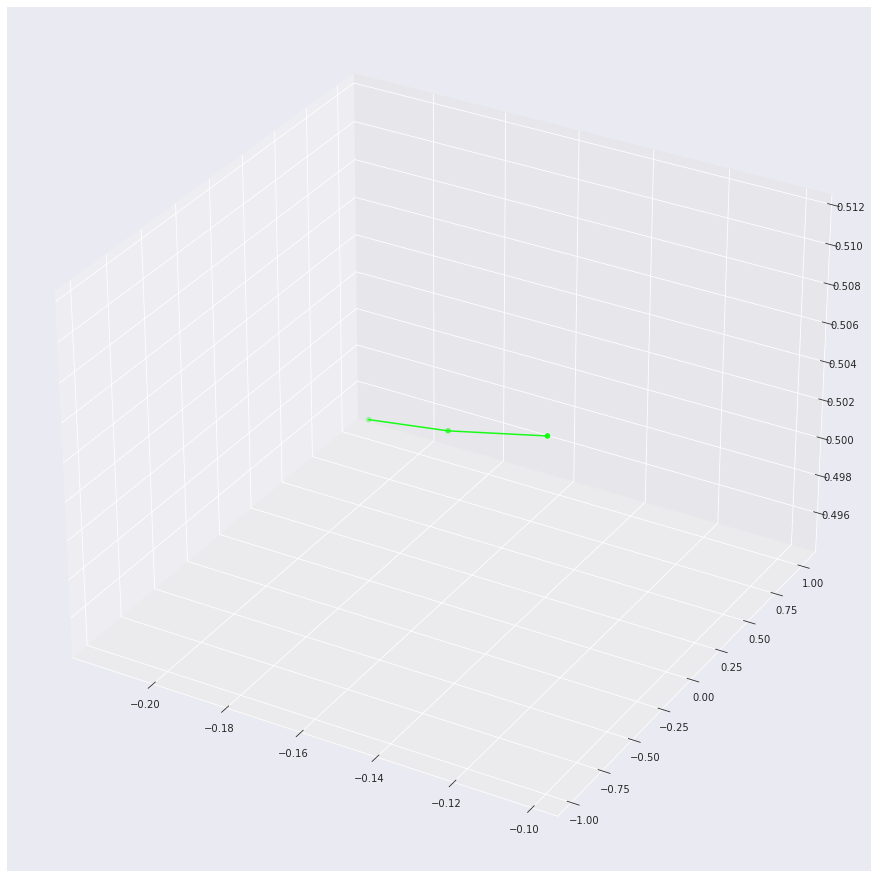

In [62]:
track = np.array([[-0.10170233766233772, 0.5113016132581087, -0.9642529460205991],
       [-0.1601984651711924, 0.5026169124435764, 0.058734816118162],
       [-0.2141454781582054, 0.49507936126065855, 0.9897707288090867]])
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig) # Method 1
draw_track_from_numpy(ax, track, 1)

In [58]:
import numpy as np
hashs = []
temp = np.load('../output/cgem_t_tracknet_bes_3/masked_tracknet_bes.npy', allow_pickle=True)

In [61]:
temp[2]

array([[-0.10170233766233772, 0.5113016132581087, -0.9642529460205991],
       [-0.1601984651711924, 0.5026169124435764, 0.058734816118162],
       [-0.2141454781582054, 0.49507936126065855, 0.9897707288090867]],
      dtype=object)

In [48]:
lens = {4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [49]:
for i, track in enumerate(temp):
    lens[len(track)]+=1
lens

{4: 35862, 5: 54085, 6: 48727, 7: 86866, 8: 78356, 9: 456592}

In [52]:
for i, track in enumerate(temp):
    if i <180000:
        continue
    if i >180010:
        break
    print(track)

[[-4.087064e+00  2.836418e-02  1.234400e+01]
 [-5.260700e+00  1.038007e+00  1.561400e+01]
 [-7.853085e+00  3.303249e+00  2.449900e+01]
 [-1.332592e+01  8.372846e+00  3.970200e+01]
 [-2.069871e+01  1.569843e+01  6.453500e+01]
 [-3.138991e+01  3.036680e+01  1.126490e+02]
 [-3.488570e+01  3.692782e+01  1.353300e+02]]
[[ 2.104243e+00 -7.506521e-01  1.234400e+01]
 [ 2.410336e+00  1.281407e-01  1.561400e+01]
 [ 3.260868e+00  2.381718e+00  2.449900e+01]
 [ 5.226301e+00  6.706666e+00  3.970200e+01]
 [ 9.167198e+00  1.354517e+01  6.453500e+01]
 [ 1.972670e+01  2.662932e+01  1.126490e+02]
 [ 2.601612e+01  3.272962e+01  1.353300e+02]]
[[  2.277548   -0.3577276  12.344    ]
 [  2.460751    0.5919499  15.614    ]
 [  2.957481    2.996795   24.499    ]
 [  4.054578    7.66634    39.702    ]
 [  6.17767    15.06441    64.535    ]
 [ 11.51182    28.95782   112.649    ]
 [ 14.57754    35.43847   135.33     ]]
[[ -1.110275   -0.5433736  12.344    ]
 [ -1.932048    0.5344788  15.614    ]
 [ -4.067745    

In [71]:
import numpy as np
hashs = []
data = np.load('../output/tracknet_bmn/masked_tracknet_bmn_all_stations.npy', allow_pickle=True)
data_lists = {4:[], 5:[], 6:[],7:[], 8:[], 9:[]}
for i, track in enumerate(data):
    if hash(track.tostring()) not in hashs:
        data_lists[len(track)].append(track)
        hashs.append(hash(track.tostring()))
    if i%1000 == 0:
        print(f"==> {i}")
    
result_list = []
for len_data in data_lists.values():
    print(len(len_data))
    result_list.extend(len_data)
print('have result number of tracks:', len(result_list))
os.mkdir('../output/cgem_t_tracknet_bmn_fixed')
np.save('../output/cgem_t_tracknet_bmn_fixed/masked_tracknet_bmn_all_stations', np.array(result_list, dtype=object), allow_pickle=True)


==> 0
==> 1000
==> 2000
==> 3000
==> 4000
==> 5000
==> 6000
==> 7000
==> 8000
==> 9000
==> 10000
==> 11000
==> 12000
==> 13000
==> 14000
==> 15000
==> 16000
==> 17000
==> 18000
==> 19000
==> 20000
==> 21000
==> 22000
==> 23000
==> 24000
==> 25000
==> 26000
==> 27000
==> 28000
==> 29000


KeyboardInterrupt: 